# Imports 

The usual ones, plus we set the style of `matplotlib` to mimick `ggplot2` of `R`.

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

# Data download


In [4]:
def ISLR2data(name):
    import io
    import zipfile
    import urllib
    url = ("https://www.statlearning.com/s/"
           "ALL-CSV-FILES-2nd-Edition-corrected.zip")
    zipdata = urllib.request.urlopen(url).read()
    with zipfile.ZipFile(io.BytesIO(zipdata)) as zf:
        for zi in zf.filelist:
            if name in zi.filename:
                with zf.open(zi) as f:
                    df = pd.read_csv(f, index_col=0)
                break
    return df

def ISLRdata(name):
    import statsmodels.datasets as smd
    data = smd.get_rdataset(name, 'ISLR')
    for k in ['__doc__', 'title', 'package']:
        setattr(data.data, k, getattr(data, k, ''))
    return data.data


# Example showing the effect of scaling when using scikit-learn

In [5]:
def semifact(n):
    res = 1
    for k in range(n,1,-2):
        res *=k
    return res

def var_zn(n):
    """variance of Z^{n},  where Z ~ N(0,1)"""
    if n%2==0:
        return semifact(2*n-1) - semifact(n-1)**2
    return semifact(2*n-1)



In [6]:
# "%e" %(semifact(19)-semifact(9)**2)
print(pd.DataFrame({f'X^{n}': var_zn(n)**0.5  for n in range(1,11)}, 
                   index=['std']).round(2))
                   #.to_latex(escape=False))

     X^1   X^2   X^3  X^4    X^5     X^6     X^7      X^8      X^9      X^10
std  1.0  1.41  3.87  9.8  30.74  100.85  367.61  1419.86  5870.22  25570.22


In [10]:
import sklearn.linear_model as linear_model
import sklearn.preprocessing as preprocessing
from sklearn.pipeline import make_pipeline, Pipeline

$x_i$ will be $100,\dots,100+\text{degree}$. $y_i\sim N(0,1)$.



In [11]:
degree=6
yscale = 1 
np.random.seed(1)
x = np.linspace(100, 100*(degree+1), degree+1)
y = np.random.normal(size=degree+1)*yscale
print(f"x={x}")
print(f"y={y}")

x=[100. 200. 300. 400. 500. 600. 700.]
y=[ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.3015387
  1.74481176]


In [12]:
X = preprocessing.PolynomialFeatures(
    degree=degree, 
    include_bias=False
    ).fit_transform(np.expand_dims(x, -1))

lm=linear_model.LinearRegression()
lm.fit(X, y)

def print_summary(model, X, y):
    regressor = model
    if isinstance(model, Pipeline):
        regressor = model[-1]

    print(f'number of predictors: {len(regressor.coef_)+(1 if hasattr(regressor, "intercept_") else 0)}, number of observations: {len(y)}')
    print(f"intercept: {regressor.intercept_:.4f}")
    print(f"coeff:\n\t{regressor.coef_.round(4)}")
    print(f'prediction error:\n\t{(model.predict(X)-y).round(5)}')

print_summary(lm, X, y)

number of predictors: 7, number of observations: 7
intercept: 1.3689
coeff:
	[ 0.      0.0002 -0.      0.     -0.      0.    ]
prediction error:
	[-0.109    0.44023 -0.78786  0.81777 -0.50175  0.16806 -0.02746]


In [13]:
lm1 = make_pipeline(preprocessing.StandardScaler(),
                    linear_model.LinearRegression())
lm1.fit(X, y)

print_summary(lm1, X, y)


number of predictors: 7, number of observations: 7
intercept: -0.0400
coeff:
	[ -356.1226  2475.3781 -7444.993  11457.9989 -8787.7738  2654.853 ]
prediction error:
	[ 0.  0.  0.  0.  0. -0. -0.]


In [14]:
print(lm1[0].transform(X))

[[-1.5        -1.16060972 -0.94288618 -0.80683936 -0.7171689  -0.65423819]
 [-1.         -0.97735555 -0.88342489 -0.78869455 -0.71180268 -0.65267705]
 [-0.5        -0.67193194 -0.72202996 -0.71006702 -0.67527779 -0.63619835]
 [ 0.         -0.24433889 -0.40773456 -0.49837754 -0.54008375 -0.55276407]
 [ 0.5         0.30542361  0.11042811 -0.05201513 -0.17639274 -0.26707537]
 [ 1.          0.97735555  0.88342489  0.75966284  0.62871287  0.50187301]
 [ 1.5         1.77145694  1.96222259  2.09633075  2.19201298  2.26108001]]


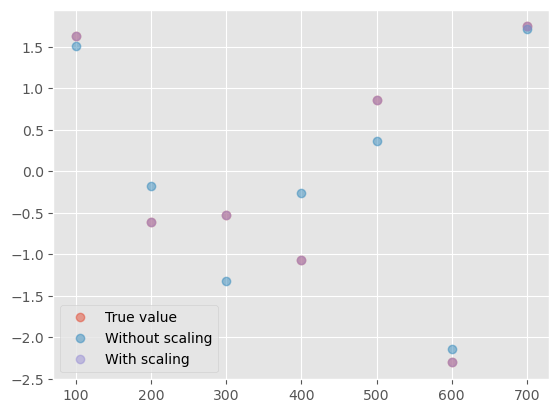

In [15]:


yhat  = lm.predict(X)
yhat1 = lm1.predict(X)
# print(lm1.predict(X)-y)

# # err=pd.DataFrame([y-lm.predict(X10),y-lm1.predict(X10), y], 
# #              columns=x,
# #              index='wo scaling,with scaling,$y$'.split(",")).round(4)

# # err.columns.name='$x$'
# # err.index.name='$y-\hat y$'
# # print(err.to_latex(escape=False))
plt.plot(x, y, 'o', alpha=0.5, label='True value')
plt.plot(x, yhat,'o', alpha=0.5, label='Without scaling')
plt.plot(x, yhat1, 'o', alpha=0.5, label='With scaling')
plt.legend()
plt.show()

# Helper functions 

To download some datasets from the ESL book homepage

In [38]:
import urllib
import pandas as pd
import numpy as np
import functools
import subprocess
import os
import json


def load_info(name):
    with urllib.request.urlopen(ESL_datasets_url+name) as f:
        return f.read().decode('utf-8')

def load_csv(name, read_csv_args):
    with urllib.request.urlopen(ESL_datasets_url+name) as f:
        return pd.read_csv(f, **read_csv_args)

def load_label(name):
    with urllib.request.urlopen(ESL_datasets_url+name) as f:
        return np.array([l.strip().decode('utf-8') for l in f.readlines()])
    
def to_array(d):
    if isinstance(d, dict):
        return {k: to_array(v) for k,v in d.items()}
    if isinstance(d, list):
        return np.array(d)
    return d

def load_rda(name):
    cmd = subprocess.run(
               ['Rscript', '--vanilla', 
                '-e' ,
                f'load(url("{ESL_datasets_url}{name}")); jsonlite::write_json(as.list(environment()), stdout())'],
                stdout=subprocess.PIPE,
                stderr=subprocess.PIPE
              )
    if cmd.returncode:
        print(cmd.stderr.decode('utf-8'))
        raise ValueError
    else:
        data = json.loads(cmd.stdout.decode('utf-8'))
        return to_array(data)


ESL_datasets_url = 'https://web.stanford.edu/~hastie/ElemStatLearn/datasets/'

ESL_datasets = {
        'prostate': {
          'meta': functools.partial(load_info, name='prostate.info.txt'), 
          'data': functools.partial(load_csv, name='prostate.data', 
                                    read_csv_args=dict(sep="\t", index_col=0))
        },
        'ozone': {
          'meta': functools.partial(load_info, name='ozone.info.txt'), 
          'data': functools.partial(load_csv, name='ozone.data', 
                                    read_csv_args=dict(sep="\t"))
        },
        'spam': {
          'meta': functools.partial(load_info, name='spam.info.txt'), 
          'data': functools.partial(load_csv, name='spam.data', 
                                    read_csv_args=dict(sep=' ', index_col=None, header=None))
        },
        'phoneme': {
          'meta': functools.partial(load_info, name='phoneme.info.txt'), 
          'data': functools.partial(load_csv, name='phoneme.data', 
                                    read_csv_args=dict(sep=',', index_col=0))
        },
        'nci_microarray': {
          'meta': functools.partial(load_info, name='nci.info.txt'), 
          'data': functools.partial(load_csv, name='nci.data.csv', 
                                    read_csv_args=dict(sep=',', index_col=0)),
          'label': functools.partial(load_label, name='nci.label'),
        },
        'sa_heart_disease': {
          'meta': functools.partial(load_info, name='SAheart.info.txt'), 
          'data': functools.partial(load_csv, name='SAheart.data', 
                                    read_csv_args=dict(sep=',', index_col='row.names'))
        },    
        'mixture':{
          'meta': functools.partial(load_info, name='mixture.example.info.txt'), 
          'data': functools.partial(load_rda, name='ESL.mixture.rda')
        },
    }   
    
class Dataset:
    def __init__(self, kwargs):
        for k,v in kwargs.items():
            setattr(self, k, v)
    def __repr__(self):
        return self.meta + '\n' + repr(self.data)
    def __str__(self):
        return str(self.data)
    
    
def load_ESL_dataset(name):
    return Dataset({k: v() for k, v in ESL_datasets[name].items()})


# Wage data

In [320]:
wage = ISLRdata('Wage')

In [26]:
wage.head()

year  age            maritl      race        education  \
231655  2006   18  1. Never Married  1. White     1. < HS Grad   
86582   2004   24  1. Never Married  1. White  4. College Grad   
161300  2003   45        2. Married  1. White  3. Some College   
155159  2003   43        2. Married  3. Asian  4. College Grad   
11443   2005   50       4. Divorced  1. White       2. HS Grad   

                    region        jobclass          health health_ins  \
231655  2. Middle Atlantic   1. Industrial       1. <=Good      2. No   
86582   2. Middle Atlantic  2. Information  2. >=Very Good      2. No   
161300  2. Middle Atlantic   1. Industrial       1. <=Good     1. Yes   
155159  2. Middle Atlantic  2. Information  2. >=Very Good     1. Yes   
11443   2. Middle Atlantic  2. Information       1. <=Good     1. Yes   

         logwage        wage  
231655  4.318063   75.043154  
86582   4.255273   70.476020  
161300  4.875061  130.982177  
155159  5.041393  154.685293  
11443   4.318063   75.043154

In [28]:
print(wage.__doc__)

.. container::

   ==== ===============
   Wage R Documentation
   ==== ===============

   .. rubric:: Mid-Atlantic Wage Data
      :name: mid-atlantic-wage-data

   .. rubric:: Description
      :name: description

   Wage and other data for a group of 3000 male workers in the
   Mid-Atlantic region.

   .. rubric:: Usage
      :name: usage

   ::

      Wage

   .. rubric:: Format
      :name: format

   A data frame with 3000 observations on the following 11 variables.

   ``year``
      Year that wage information was recorded

   ``age``
      Age of worker

   ``maritl``
      A factor with levels ``1. Never Married`` ``2. Married``
      ``3. Widowed`` ``4. Divorced`` and ``5. Separated`` indicating
      marital status

   ``race``
      A factor with levels ``1. White`` ``2. Black`` ``3. Asian`` and
      ``4. Other`` indicating race

   ``education``
      A factor with levels ``1. < HS Grad`` ``2. HS Grad``
      ``3. Some College`` ``4. College Grad`` and ``5. Advanced Degr

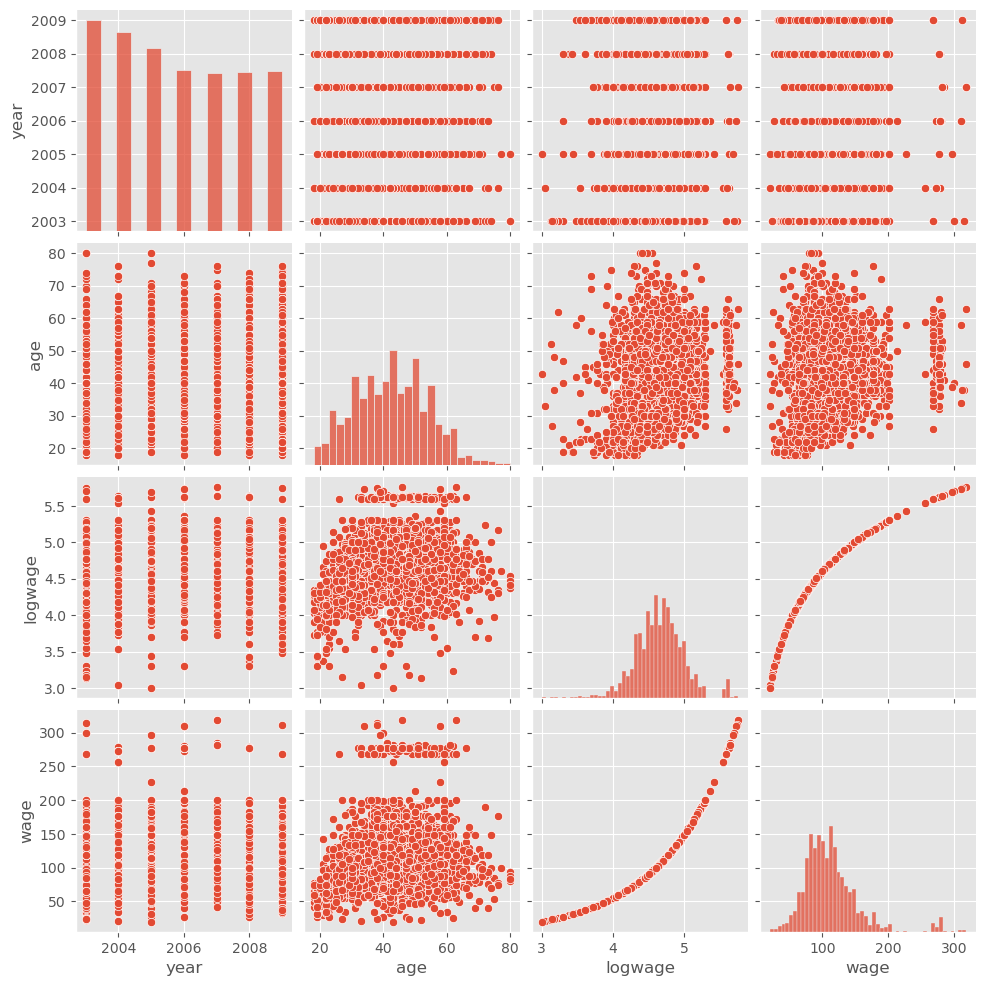

In [321]:
sns.pairplot(data=wage)

In [23]:
cols = ['age', 'education', 'year']
grouped_wage = wage[['wage'] + cols].groupby(cols)

RSS = grouped_wage.agg([lambda x: len(x)*((x**2).mean()-x.mean()**2)]).sum()
TSS = ((wage.wage-wage.wage.mean())**2).sum()

print(f" RSS:{float(RSS):.2f}, TSS:{TSS:.2f}, R^2:{1-float(RSS)/TSS:.3f}")

len(wage.age.unique())*len(wage.education.unique())*len(wage.year.unique()) - len(grouped_wage)

 RSS:2163252.83, TSS:5222085.77, R^2:0.586


883

We want to understand the relation between `age` and `wage`.

## Recap, Confidence interval for logistic regression

For maximum likelihood estimation (ML) the estimated parameter is asymptotically normal (under quite general assumptions).
$$
    \sqrt{n}(\hat{\beta}-\beta^*) \approx N(0, I^{-1}_1(\beta^*))
$$
Here $\beta^*$ is the true parameter and 
$$
I_1(\beta^*)
=\mathbb{E}_{\beta^*}((\partial_\beta\ell)(\partial_\beta\ell)^T)
=\mathbb{E}_{\beta^*}(\partial_\beta^2\ell)
$$ finally $\ell$ is the loglikelihood $\ell=\log f_{\beta}(X,Y)$. 

The reason is that $\hat\beta$ solves the likelihood equation $\partial_\beta \text{NLL}(\hat\beta)=0$, while
$$
    \frac1{\sqrt{n}}\partial_\beta\text{NLL}(\beta^*) = \frac{1}{\sqrt{n}}\sum_{i=1}^n \partial_\beta \ell(x_i,y_i,\beta^*) \approx N(0, I_1(\beta^*)) 
$$

At the same time if $\hat\beta$ is close to $\beta^*$
$$
0 = \partial_\beta\text{NLL}(\hat\beta)=\partial_\beta\text{NLL}(\beta^*)+\partial_\beta^2 \text{NLL}(\beta^*)(\hat\beta-\beta^*) + \text{small error} 
$$
and
$$
    \sqrt{n}(\hat\beta-\beta^*) 
    \approx \left(\frac{1}{n}\partial_\beta^2\text{NLL}(\beta^*)\right)^{-1}\frac{1}{\sqrt{n}}\partial_\beta\text{NLL}(\beta^*)
    \approx I_1(\beta^*)^{-1}\partial_\beta\text{NLL}(\beta^*)
    \approx N(0, I^{-1}_1(\beta^*))
$$

For a new observation $x_0$ 
$$
    (x_0\hat\beta-x_0\beta^*)\approx N(0, \frac{1}{n}x_0 I^{-1} x_0^T)
$$
And a confidence interval of approximately 95 % confidence level is easily obtained as
$$
    (x_0\hat\beta-2\sigma,x_0\hat\beta+2\sigma), \quad\text{with}
    \quad \sigma=\sqrt{\frac{1}{n}x_0 I^{-1} x_0^T}
$$

$I$ is unknown as it involves $\beta^*$ but can be estimated from the data. For the logistic regression it goes as follows
$$
\mathbb{P}(Y=y | X=x, \beta) = f(x, y, \beta)=\begin{cases}
\frac{1}{1+e^{-x\beta}}& y=1\\
\frac{1}{1+e^{x\beta}}& y=0
\end{cases}
= \frac{1}{1+e^{-(2y-1)x\beta}}
$$
The negative log likelihood
$$
\ell(x,y,\beta) = \ln(1+e^{-(2y-1)x\beta}),\quad 
\partial_{\beta_k} \ell(x, y, \beta) = \frac{-(2y-1)x_k}{1+e^{-(2y-1)x\beta}},\quad
\partial_{\beta_k}\partial_{\beta_j} \ell(x, y, \beta) = \frac{x_kx_j}{(1+e^{-(2y-1)x\beta})^2}
$$

$$
    \mathbb{E}_{\beta^*}\left(\partial_{\beta_k}\partial_{\beta_j} \ell|X=x\right)
    = x_kx_j \left(\frac{1}{p^2} p+\frac{1}{(1-p)^2}(1-p)\right)=\frac{x_kx_j}{p(1-p)},
    \quad
    \text{where $p=p(x)=\mathbb{P}(Y=1|X=x, \beta^*)$}
$$

$$
    I=\mathbb{E}_{\beta^*}\left(X^TX\frac{1}{p(X)(1-P(X))}\right)\approx \frac1n \sum_{i=1}^n x_i^T x_i \frac{1}{\hat p_i(1-\hat p_i)}
$$

$I$ is called the **Fisher information**.

In matrix form
$$
    \hat I = \frac1n \sum_{i=1}^n x_i^T x_i \frac{1}{\hat p_i(1-\hat p_i)}
    =\frac1{n}\mathbf{X}^T \mathbf{W}^{-1} \mathbf{X}
    \quad
    \text{where $\mathbf{W}=\text{diag}(\hat p_i(1-\hat p_i)$}.
$$
So the estimated variance of the estimation $x_0\hat\beta$ is
$$
    \frac{1}{n} x_0 {\hat I}^{-1} x_0^T 
    = x_0 (\mathbf{X}^T \mathbf{W}^{-1} \mathbf{X})^{-1} x_0^T 
    = x_0 (R^T R)^{-1} x_0^T 
    = \left\|R^{-T} x_0^T \right\|^2,
    \quad \text{if $QR=\mathbf{W}^{-1/2} \mathbf{X}$ is the QR-decomposition.} 
$$

For linear regression the computation simplifies as $\sigma^2\mathbf{W}$ is the identity.

### Code for computing the confidence interval for the mean of the predicted value

In [29]:
from sklearn.metrics import make_scorer, mean_squared_error

def add_one(X):
    return np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)


def sigma_haty(model, X_train, y_train, X):
    preprocess = model[:-1]
    regressor = model[-1]
    X0_train = preprocess.transform(X_train)
    X0_test = preprocess.transform(X)
    
    if regressor.fit_intercept:
        X0_train = add_one(X0_train)
        X0_test = add_one(X0_test)

    _, R = np.linalg.qr(X0_train)
    sigma = make_scorer(mean_squared_error)(model, X_train, y_train)**0.5
    # print(sigma)
    return np.linalg.norm(np.linalg.solve(R.T, X0_test.T), axis=0)*sigma


In [31]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def conf_int_logistic(model, X_train, y_train, X):
    preprocess, regressor = model[:-1], model[-1]

    X0 = add_one(preprocess.transform(X_train))

    p = model.predict_proba(X_train)[:,1]
    
    w = (p*(1-p))**0.5
    _, R = np.linalg.qr(np.expand_dims(w,-1)*X0)

    X0 = add_one(preprocess.transform(X))

    d = 2*np.linalg.norm(np.linalg.solve(R.T, X0.T), axis=0)
    p = model.predict_proba(X)[:,1]
    eta = np.log(p/(1-p))
    
    return sigmoid(eta-d), sigmoid(eta+d)


# Polynomial regression

## Wage dataset

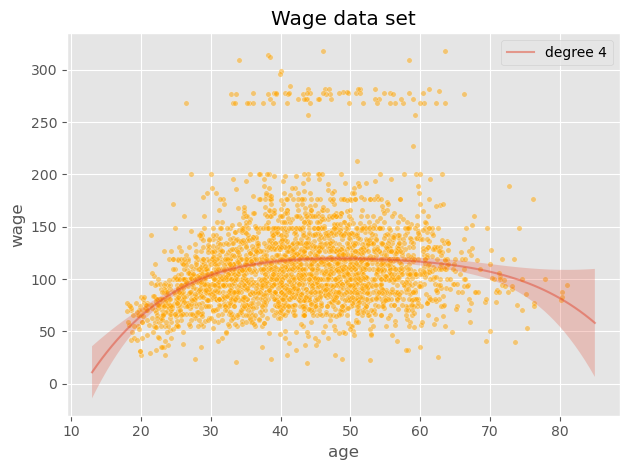

In [322]:
X = wage[['age']]
y = wage.wage
# print(X.shape,y.shape)

plt.figure(tight_layout=True)
sns.scatterplot(
    x=X.age+np.random.uniform(size=len(X.age)), 
    y=y, 
    s=15, 
    alpha=0.5, 
    color='orange'
    )

x0 = np.linspace(X.age.min()-5, X.age.max()+5, 101)
x0_df = pd.DataFrame(dict(age=x0))

for d in [4]:
    poly = make_pipeline(
        preprocessing.PolynomialFeatures(degree=d,include_bias=False),
        preprocessing.StandardScaler(),
        linear_model.LinearRegression()
        ).fit(X,y)

    haty = poly.predict(x0_df)
    sigma = sigma_haty(poly, X, y, x0_df)
    
    plt.fill_between(x0, haty-2*sigma,  haty+2*sigma, alpha=0.25)
    plt.plot(x0,haty, alpha=0.5, label=f'degree {d}')

plt.legend()
plt.title('Wage data set')
# plt.savefig('plots/11-26-poly-wage.pdf')
plt.show()

There are two clusters (groups) on the plot. One group has much higher wage than the other group. 
Let estimate the probability that someone with a given `age` has `wage` higher than 250.

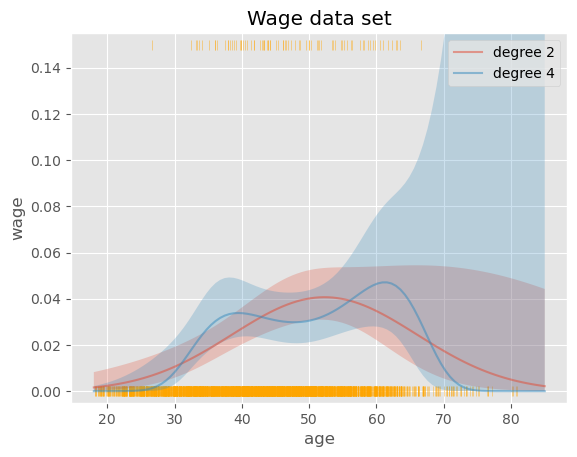

In [36]:
#print(X.shape,y.shape)
sns.scatterplot(x=X.age+np.random.uniform(size=len(X.age)), 
                y=0.15*(y>250), 
                marker='|', s=50, color='orange', alpha=0.5)
x0 = np.linspace(X.age.min(), X.age.max()+5, 101)
x0_df = pd.DataFrame(dict(age=x0))

for d in [2, 4]:
    poly = make_pipeline(
        preprocessing.PolynomialFeatures(degree=d,include_bias=False),
        preprocessing.StandardScaler(),
        linear_model.LogisticRegression(
            penalty='none',
            solver='newton-cg')
        ).fit(X,1*(y>250))
        
    haty = poly.predict_proba(x0_df)[:,1]
    plt.fill_between(x0, *conf_int_logistic(poly, X, y, x0_df), alpha=0.25)
    plt.plot(x0,haty, alpha=0.5, label=f'degree {d}')

plt.ylim(-0.005,0.155)
plt.legend()
plt.title('Wage data set')
plt.show()

## Heart disease data


In [39]:
heart = load_ESL_dataset('sa_heart_disease')

In [40]:
print(heart.meta)
print(heart.data.head())
heart.data.describe()

A retrospective sample of males in a heart-disease high-risk region
of the Western Cape, South Africa. There are roughly two controls per
case of CHD. Many of the CHD positive men have undergone blood
pressure reduction treatment and other programs to reduce their risk
factors after their CHD event. In some cases the measurements were
made after these treatments. These data are taken from a larger
dataset, described in  Rousseauw et al, 1983, South African Medical
Journal. 

sbp		systolic blood pressure
tobacco		cumulative tobacco (kg)
ldl		low densiity lipoprotein cholesterol
adiposity
famhist		family history of heart disease (Present, Absent)
typea		type-A behavior
obesity
alcohol		current alcohol consumption
age		age at onset
chd		response, coronary heart disease

To read into R:
read.table("http://www-stat.stanford.edu/~tibs/ElemStatLearn/datasets/SAheart.data",
	sep=",",head=T,row.names=1)

           sbp  tobacco   ldl  adiposity  famhist  typea  obesity  alcohol  \
row.names    

sbp     tobacco         ldl   adiposity       typea     obesity  \
count  462.000000  462.000000  462.000000  462.000000  462.000000  462.000000   
mean   138.326840    3.635649    4.740325   25.406732   53.103896   26.044113   
std     20.496317    4.593024    2.070909    7.780699    9.817534    4.213680   
min    101.000000    0.000000    0.980000    6.740000   13.000000   14.700000   
25%    124.000000    0.052500    3.282500   19.775000   47.000000   22.985000   
50%    134.000000    2.000000    4.340000   26.115000   53.000000   25.805000   
75%    148.000000    5.500000    5.790000   31.227500   60.000000   28.497500   
max    218.000000   31.200000   15.330000   42.490000   78.000000   46.580000   

          alcohol         age         chd  
count  462.000000  462.000000  462.000000  
mean    17.044394   42.816017    0.346320  
std     24.481059   14.608956    0.476313  
min      0.000000   15.000000    0.000000  
25%      0.510000   31.000000    0.000000  
50%      7.510000   45.000000    0.000000  
75%     23.892500   55.000000    1.000000  
max    147.190000   64.000000    1.000000

**Adiposity** is another term for **obesity**. It is probably measured differently, but the variables are highly correlated.

<AxesSubplot:xlabel='obesity', ylabel='adiposity'>

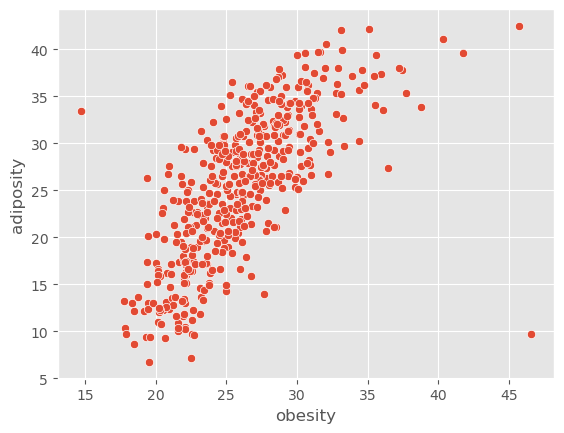

In [41]:
sns.scatterplot(
    x='obesity', 
    y='adiposity', 
    data=heart.data
    )

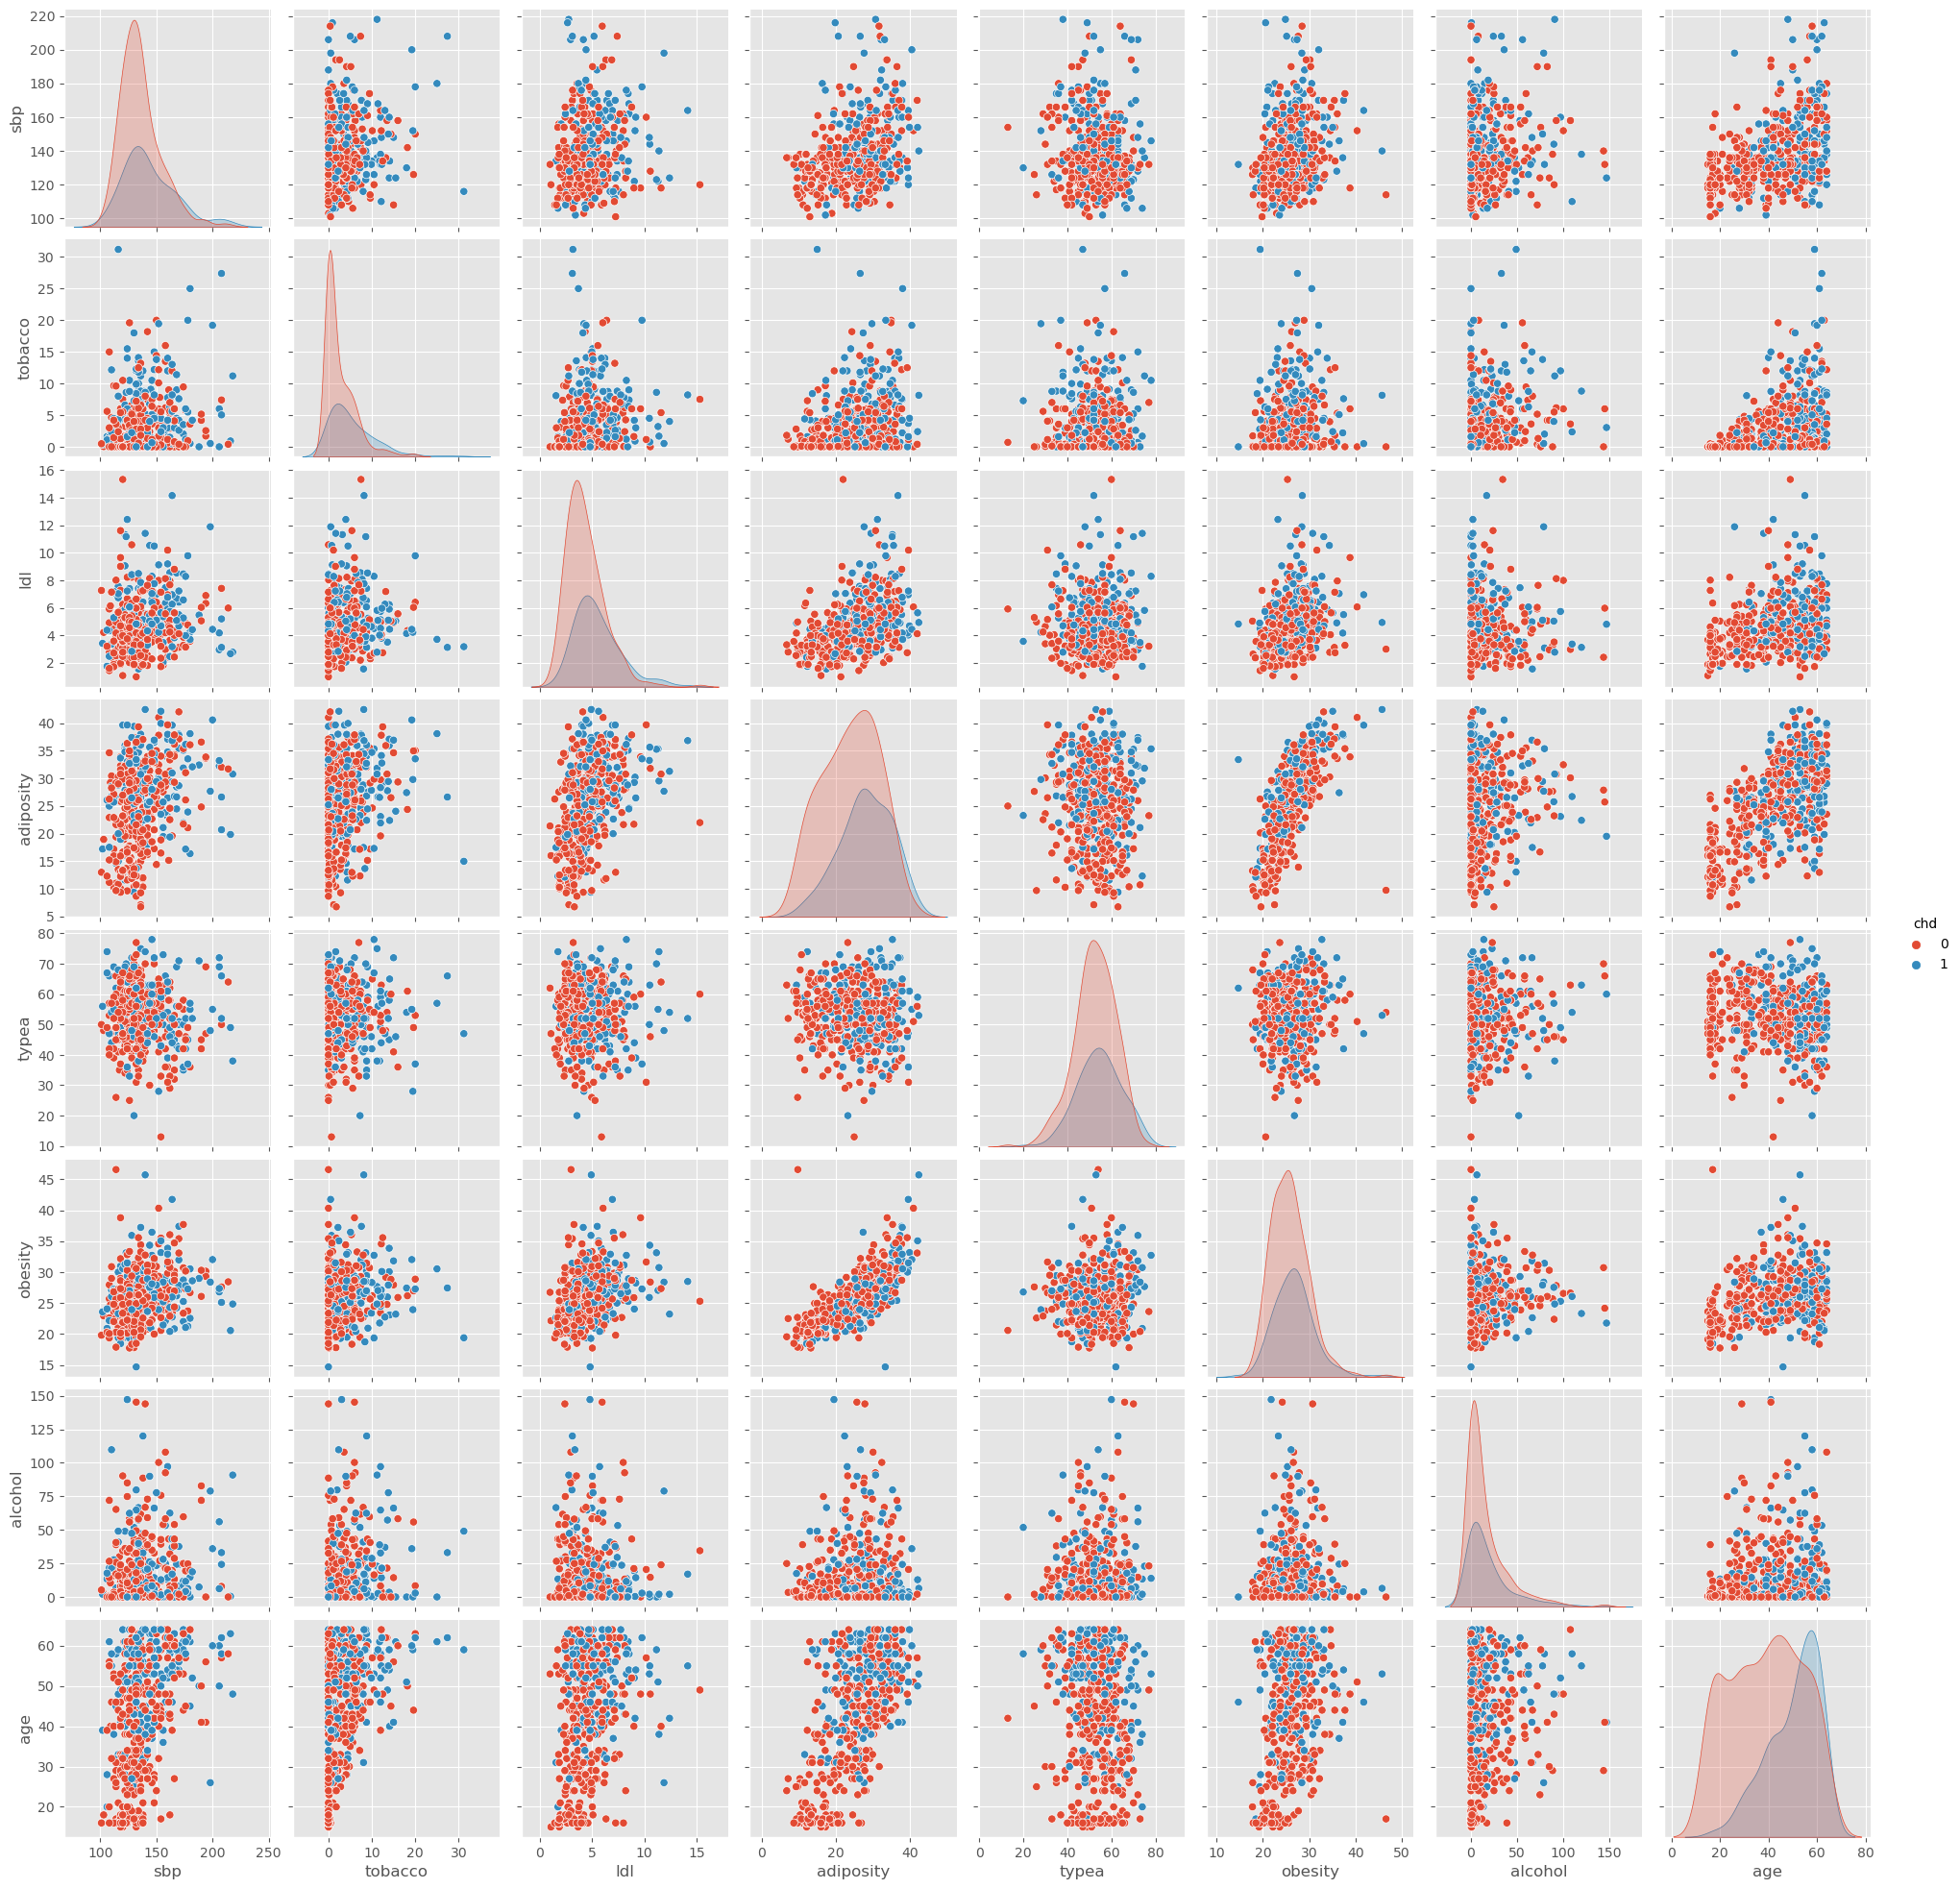

In [59]:
sns.pairplot(heart.data, hue='chd')

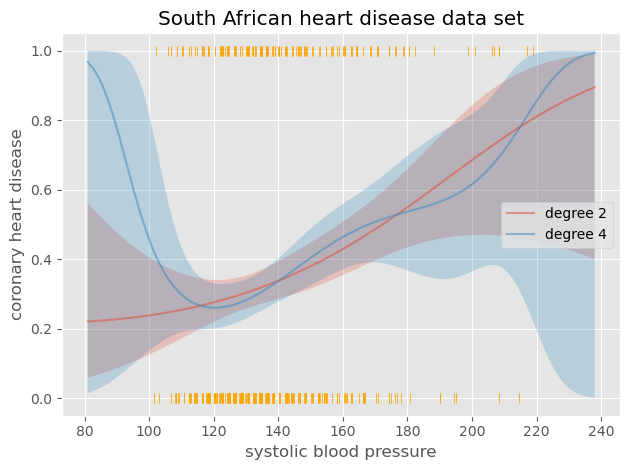

In [42]:
X, y = heart.data[['sbp']], heart.data.chd
# print(X.shape,y.shape)

plt.figure(tight_layout=True)

sns.scatterplot(
    x=X.sbp+np.random.uniform(size=len(X.sbp)), 
    y=y, 
    s=50,
    marker='|', 
    color='orange'
)


x0 = np.linspace(X.sbp.min()-20, X.sbp.max()+20, 101)
x0_df = pd.DataFrame(dict(sbp=x0))


for d in [2,4]:
    poly = make_pipeline(
        preprocessing.PolynomialFeatures(degree=d,include_bias=False),
        preprocessing.StandardScaler(),
        linear_model.LogisticRegression(
            penalty='none',
            solver='newton-cg')
            ).fit(X,y)

    haty = poly.predict_proba(x0_df)[:,1]
    plt.fill_between(
        x0, 
        *conf_int_logistic(poly,X,y,x0_df),
        alpha=0.25
        )
    plt.plot(x0, haty, alpha=0.5, label=f'degree {d}')

plt.legend()
plt.xlabel('systolic blood pressure')
plt.ylabel('coronary heart disease')
plt.title('South African heart disease data set')
# plt.savefig('plots/11-26-poly-sa-heart.pdf')
plt.show()

Higher order modells are more flexible, but with greater variance, wider confidence strip.

# Piecewise polynomial models

In [61]:

import sklearn.decomposition as decomposition
import sklearn.compose as compose
import sklearn.feature_extraction as f_extraction
import sklearn.feature_selection as f_selection
import sklearn.preprocessing as preprocessing
import sklearn.kernel_ridge
import patsy

In [20]:
# preprocessing.KBinsDiscretizer?
None

Subdivision intervals from division  points

In [63]:
def get_intervals(c_points):
    c0 = float(-np.inf)
    for c in c_points:
        c = float(c)
        yield c0, c
        c0 = c
    yield c0, float(np.inf)

# Piecewise constant regression function

The `KBinDiscretizer` object of `sklearn.preposcessing` modul encodes the location of  observation into  a zero-one vector. 
The sum of these derived predictors is one, therfore we can omit the intercept term from the model.

## Wage dataset

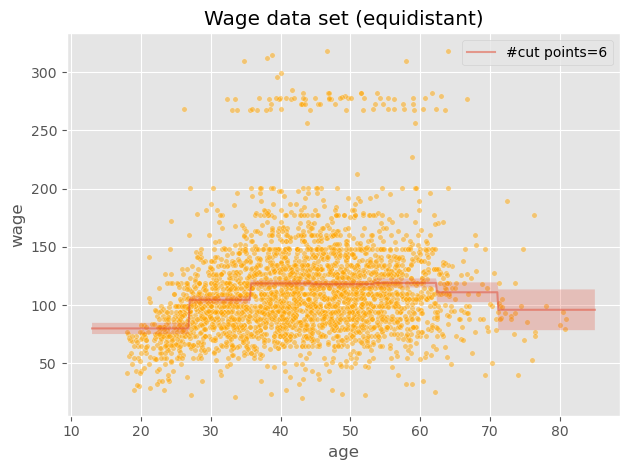

In [43]:
X = wage[['age']]
y = wage.wage
# print(X.shape,y.shape)
plt.figure(tight_layout=True)

sns.scatterplot(
    x=X.age+np.random.uniform(size=len(X.age)), 
    y=y, 
    s=15, 
    alpha=0.5, 
    color='orange'
    )

x0 = np.linspace(X.age.min()-5, X.age.max()+5, 501)
x0_df = pd.DataFrame(dict(age=x0))

for d in range(7,8):
    steps = make_pipeline(
        preprocessing.KBinsDiscretizer(
            n_bins=d, 
            strategy='uniform',
            encode='onehot-dense'
            ),
        linear_model.LinearRegression(fit_intercept=False)
        ).fit(X,y)
    
    haty = steps.predict(x0_df)
    sigma = sigma_haty(steps, X, y, x0_df)
    plt.fill_between(
        x0, 
        haty-2*sigma,  
        haty+2*sigma, 
        alpha=0.25
        )
    plt.plot(x0, haty, alpha=0.5, label=f'#cut points={d-1}')
    
plt.legend()
plt.title('Wage data set (equidistant)')
# plt.savefig('plots/11-26-step-wage.pdf')
plt.show()

# Heart disease data

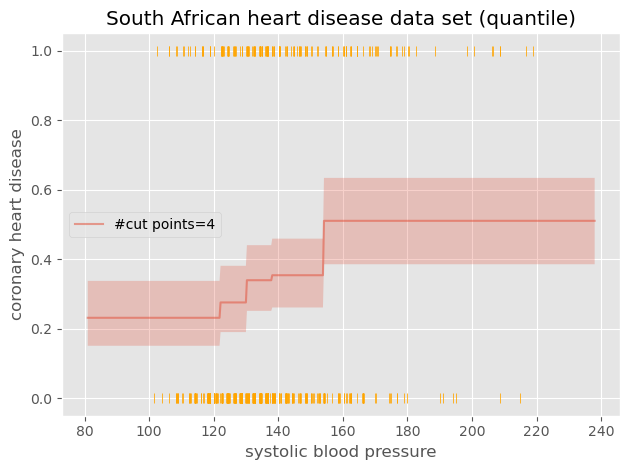

In [67]:
X, y = heart.data[['sbp']], heart.data.chd
# print(X.shape,y.shape)
plt.figure(tight_layout=True)
sns.scatterplot(
    x=X.sbp+np.random.uniform(size=len(X.sbp)), 
    y=y, 
    s=50, 
    marker='|', 
    color='orange'
    )
x0 = np.linspace(X.sbp.min()-20, X.sbp.max()+20, 501)
x0_df = pd.DataFrame(dict(sbp=x0))


for d in range(5,6):
    steps = make_pipeline(
        preprocessing.KBinsDiscretizer(
            n_bins=d, 
            strategy='quantile', 
            encode='onehot-dense'
            ),
        #PolynomialFeatures(degree=d,include_bias=False),
        #preprocessing.StandardScaler(),
        linear_model.LogisticRegression(
            penalty='none',
            solver='newton-cg'
            )
        ).fit(X,y)
    
    haty = steps.predict_proba(x0_df)[:,1]
    #sigma = sigma_haty(poly, X, y, x0_df)
    plt.fill_between(
        x0, 
        *conf_int_logistic(steps,X,y,x0_df), #haty-2*sigma,  haty+2*sigma, 
        alpha=0.25
        )
    plt.plot(x0, haty, alpha=0.5, label=f'#cut points={d-1}')

plt.legend()
plt.xlabel('systolic blood pressure')
plt.ylabel('coronary heart disease')
plt.title('South African heart disease data set (quantile)')
# plt.savefig('plots/11-26-step-sa-heart.pdf')
plt.show()

# Piecewise Polynomial regression

It turns out that it is not a particularly good idea,  so there is no implementation in `sklearn`, we have to implement it by ourself.

In [44]:
class PiecewisePoly:
    def __init__(self, poly_kwargs, kbin_kwargs):
        self.poly = preprocessing.PolynomialFeatures(**poly_kwargs)
        self.bin = preprocessing.KBinsDiscretizer(**kbin_kwargs)
    
    def fit(self, X, y=None, **kwargs):
        self.poly.fit(X, y)
        self.bin.fit(X, y)
        return self
    
    def transform(self, X, **kwargs):
        X0 = self.poly.transform(X)
        X1 = self.bin.transform(X)
        X = (np.expand_dims(X0, -1)*np.expand_dims(X1, -2))
        X = X.reshape(X0.shape[0], X0.shape[1]*X1.shape[1])
        return X
    
    def fit_transform(self, X, y=None, **kwargs):
        return self.fit(X, y, **kwargs).transform(X, **kwargs)

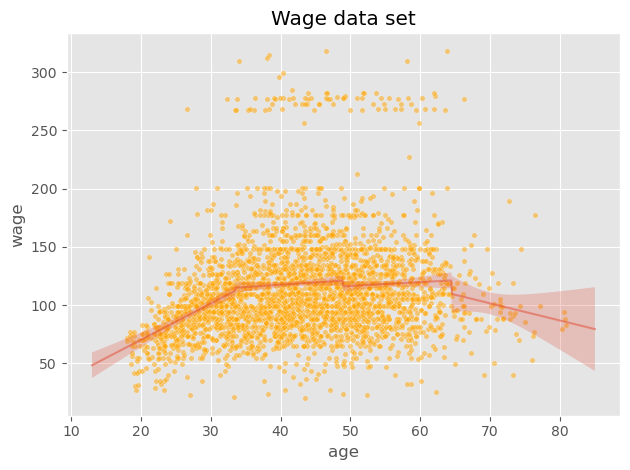

In [45]:
X = wage[['age']]
y = wage.wage
# print(X.shape,y.shape)
plt.figure(tight_layout=True)
sns.scatterplot(
    x=X.age+np.random.uniform(size=len(X.age)), 
    y=y, 
    s=15, 
    alpha=0.5,
    color='orange'
)
x0 = np.linspace(X.age.min()-5, X.age.max()+5, 501)
x0_df = pd.DataFrame(dict(age=x0))

for d in range(4,5):
    model = make_pipeline(
        PiecewisePoly(
            poly_kwargs=dict(degree=1),
            kbin_kwargs=dict(
                n_bins=d,
                strategy='uniform',
                encode='onehot-dense'
                ),
        ),
        linear_model.LinearRegression(fit_intercept=False)
        ).fit(X,y)
    
    haty = model.predict(x0_df)
    sigma = sigma_haty(model, X, y, x0_df)
    plt.fill_between(
        x0, 
        haty-2*sigma,  
        haty+2*sigma, 
        alpha=0.25
    )
    plt.plot(x0,haty, alpha=0.5)

plt.title('Wage data set')
# plt.savefig('plots/11-26-pwlin-wage.pdf')
plt.show()

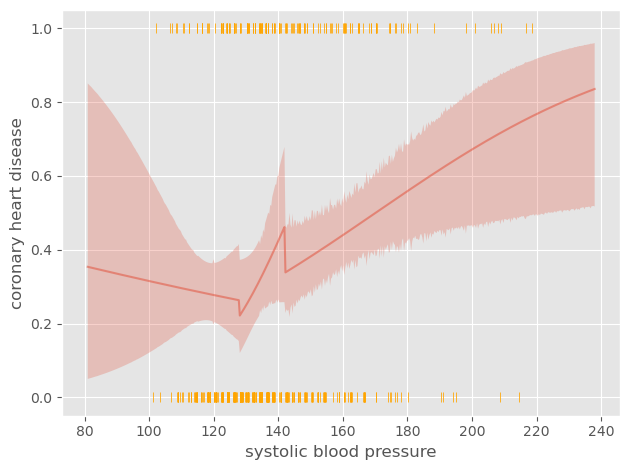

In [46]:
X, y = heart.data[['sbp']], heart.data.chd
# print(X.shape,y.shape)
plt.figure(tight_layout=True)
sns.scatterplot(
    x=X.sbp+np.random.uniform(size=len(X.sbp)), 
    y=y, 
    s=50, 
    marker='|', 
    color='orange'
    )

x0 = np.linspace(X.sbp.min()-20, X.sbp.max()+20, 501)
x0_df = pd.DataFrame(dict(sbp=x0))


for d in [3]:
    model = make_pipeline(
        PiecewisePoly(
            poly_kwargs=dict(degree=1),
            kbin_kwargs={
                'n_bins': d, 
                'strategy': 'quantile',
                'encode':'onehot-dense'
            },                               ),
            linear_model.LogisticRegression(
                penalty='none',
                solver='newton-cg'
            )
        ).fit(X, y)

    haty = model.predict_proba(x0_df)[:,1]
    plt.fill_between(
        x0, 
        *conf_int_logistic(model, X, y, x0_df),
        alpha=0.25
    )
    
    plt.plot(x0, haty, alpha=0.5) 

plt.xlabel('systolic blood pressure')
plt.ylabel('coronary heart disease')
# plt.title('South African heart disease data set (quantile)')
# plt.savefig('plots/11-26-pwlin-sa-heart.pdf')
plt.show()

# Splines

Splines of **order** $k$ are piecewise polynomial function of **degree** $k-1$ with continuous derivatives up to order $k-2$.
The division points are called **knots**

For $k=1$ we have the piecewise constant functions (step functions)

For $k=2$ we get the piecewise linear continuous functions

For $k=4$ we get the **cubic splines**! These are piecewise polynomials of degree 3. The function and its first and second derivatives are continuous.

## Example

The simplest way to choose a basis in the space of cubic splines is the truncated power basis:
$$
    1, x, x^2, x^3, (x-t_1)_+^{3}, \dots, (x-t_n)_+{3}
$$
However this creates highly correlated predictors

In [182]:
class TRBasis:
    def __init__(self, t):
        self.t = t

    def transform(self, X):
        return np.concatenate([self._transform(x) for x in X.T], axis=1)

    def _transform(self, x):
        return np.stack([x, x**2, x**3] + [(x-ti)**3 for ti in self.t], axis=1)
    def fit(self, x):
        return x 

    def fit_transform(self, x):
        return self.transform(x)
        


<AxesSubplot:>

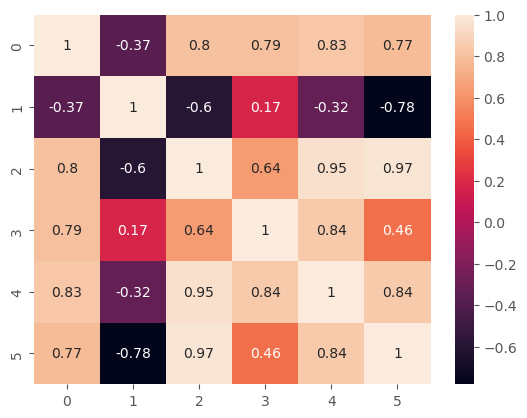

In [209]:
x = np.random.normal(size=(100,1))
t = np.percentile(x, [25, 50, 75])
X = TRBasis(t).transform(x)
sns.heatmap(np.corrcoef(X.T), annot=True)


## Bsplines

It defines a basis on $[t_1,t_n]$.

The `scipy.interpolate` makes it available in Python. The class is `BSpline`

To get a cubic spline on $[t_1,t_n]$ it requires three additional points at both end of the interval. It is recommended to use distinct points. For example 
`sklearn` adds equidistant points. 

A `BSpline` object has a subdivision attribute `t`, control values `c` and a degree `k`.

If the length of `t` is $n+6$ then it computes $n+2$ basis functions and return the linear combinations of them with the coefficients given in `c`

If `c` is the identity matrix of size $n+2$  then a call to a `BSPline` object evaluates the basis functions at the given points.

Outside the interval $[t_1,t_n]$ these functions are not defined. 

[-2.62070527 -1.37786211 -0.98842031 -0.54724975 -0.36859854 -0.12594053
  0.17131154  0.48334021  0.91849183  1.90162296]
[-0.66666667 -0.44444444 -0.22222222  0.          0.22222222  0.44444444
  0.66666667  0.88888889  1.11111111  1.33333333  1.55555556  1.77777778
  2.          2.22222222  2.44444444  2.66666667]


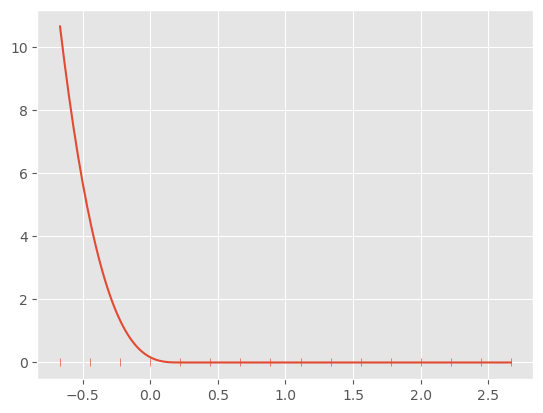

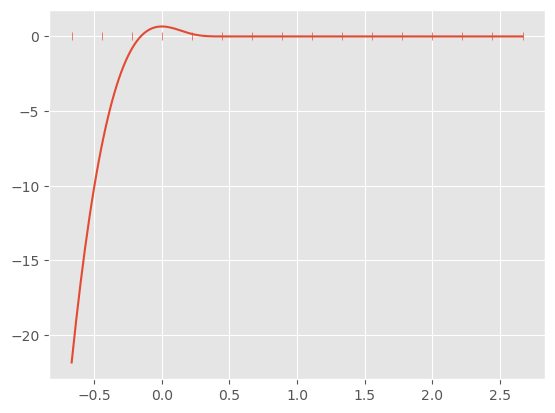

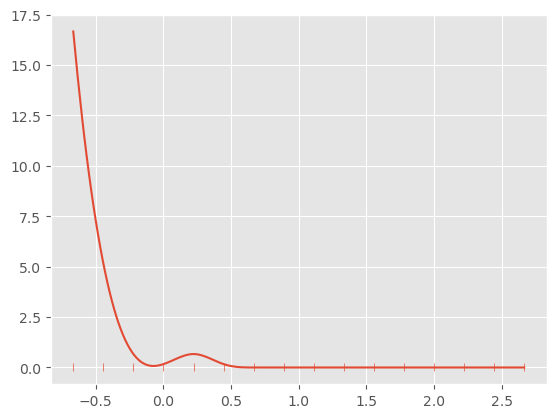

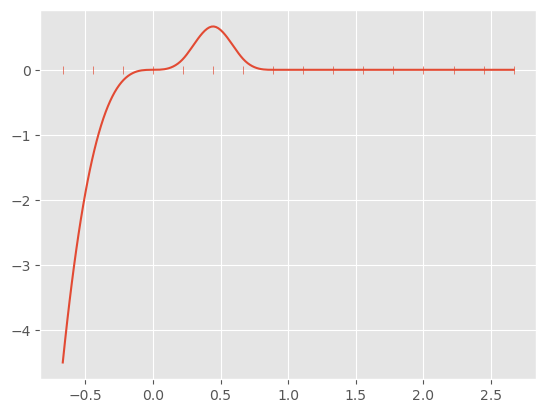

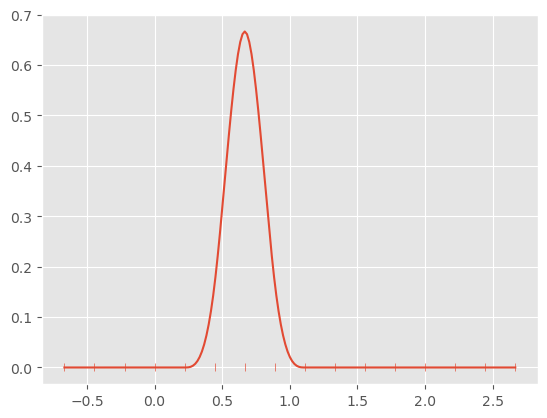

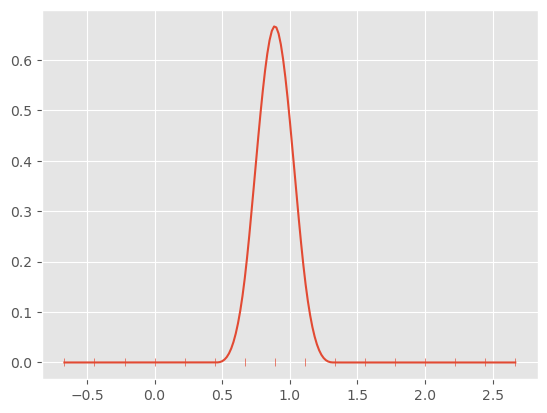

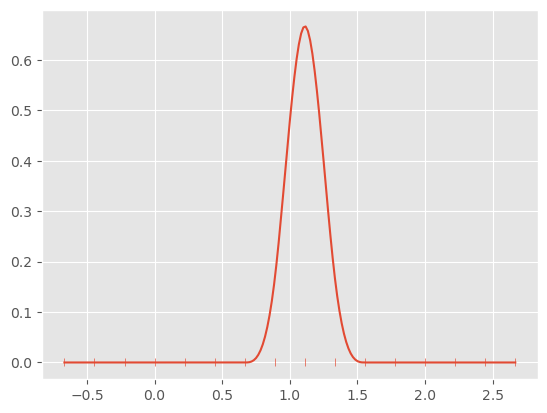

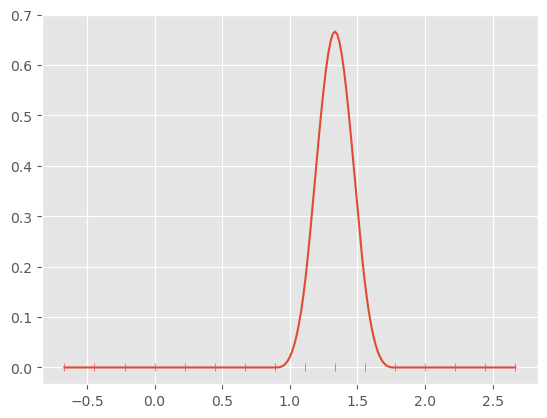

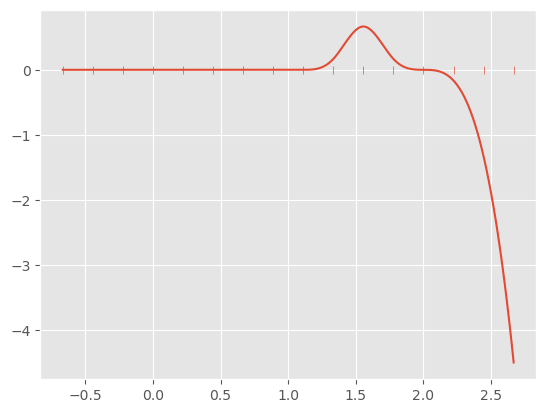

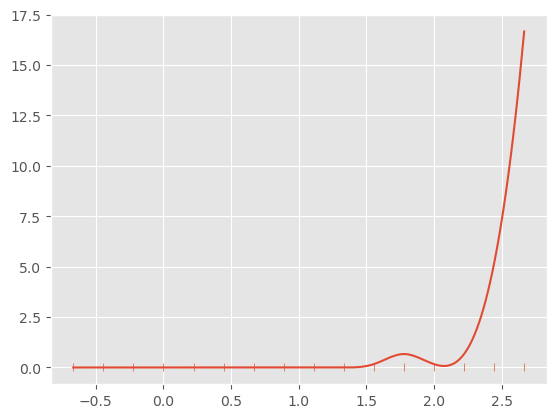

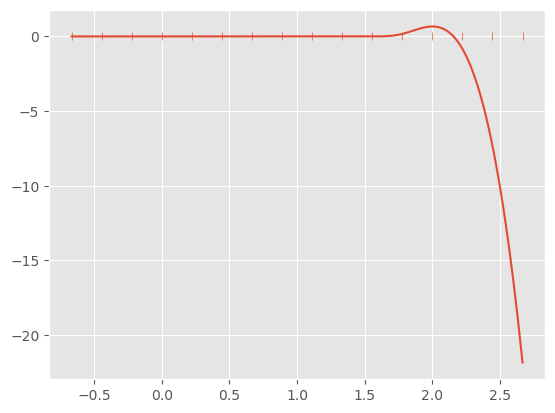

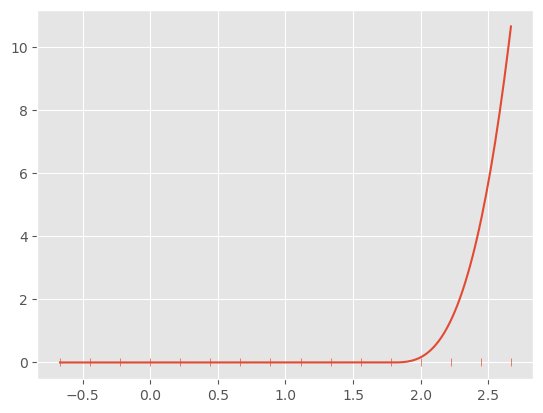

In [323]:
from scipy.interpolate import BSpline

def extend(t):
    d0 = t[0] - t[1]
    d1 = t[-1] - t[-2]
    return np.concatenate(
        (
            t[0]+np.arange(3,0,-1)*d0,
            t, 
            t[-1]+np.arange(1,4)*d1
        )
    )

print(t)
t = np.percentile(x, np.linspace(0, 100, 10)) 
t0 = extend(t)
print(t0)

spline = BSpline(t0, c=np.eye(len(t)+2), k=3)

x0 = np.linspace(t0[0], t0[-1], 201)
for f in spline(x0, extrapolate=True).T:
    sns.scatterplot(x=t0, y=0, marker="|")
    sns.lineplot(x=x0, y=f)
    plt.show()

In `sklearn.preprocess` there is  `SplineTransformer` which builds on `BSpline`.

It will select the knots  for you, if you want, based on the data. It is also possible to define how to continue the functions beyond the span of the knots (without the extra knots).
 

{'t': array([ 50.,  67.,  84., 101., 118., 126., 132., 136., 146., 160., 218.,
       276., 334., 392.]), 'c': array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]]), 'k': 3, 'extrapolate': True, 'axis': 0}


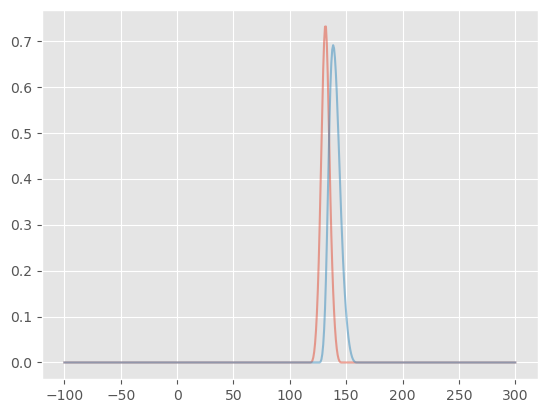

In [228]:
X = heart.data[['sbp']]
spl=preprocessing.SplineTransformer(
    degree=3, 
    n_knots=8,
    extrapolation='continue',
    knots='quantile'
    ).fit(X.values)

bspline = spl.bsplines_[0]

print(bspline.__dict__)


x0 = np.linspace(-100, 300, 501)
for f in spl.transform(x0.reshape(-1,1)).T[4:6]:
    sns.lineplot(x=x0, y=f, alpha=0.5)

plt.show()



In [143]:
# BSpline?

Init signature: BSpline(t, c, k, extrapolate=True, axis=0)
Docstring:     
Univariate spline in the B-spline basis.

.. math::

    S(x) = \sum_{j=0}^{n-1} c_j  B_{j, k; t}(x)

where :math:`B_{j, k; t}` are B-spline basis functions of degree `k`
and knots `t`.

Parameters
----------
t : ndarray, shape (n+k+1,)
    knots
c : ndarray, shape (>=n, ...)
    spline coefficients
k : int
    B-spline degree
extrapolate : bool or 'periodic', optional
    whether to extrapolate beyond the base interval, ``t[k] .. t[n]``,
    or to return nans.
    If True, extrapolates the first and last polynomial pieces of b-spline
    functions active on the base interval.
    If 'periodic', periodic extrapolation is used.
    Default is True.
axis : int, optional
    Interpolation axis. Default is zero.

Attributes
----------
t : ndarray
    knot vector
c : ndarray
    spline coefficients
k : int
    spline degree
extrapolate : bool
    If True, extrapolates the first and last polynomial pieces of b-spline


In [180]:
# preprocessing.SplineTransformer?

Init signature:
preprocessing.SplineTransformer(
    n_knots=5,
    degree=3,
    *,
    knots='uniform',
    extrapolation='constant',
    include_bias=True,
    order='C',
)
Docstring:     
Generate univariate B-spline bases for features.

Generate a new feature matrix consisting of
`n_splines=n_knots + degree - 1` (`n_knots - 1` for
`extrapolation="periodic"`) spline basis functions
(B-splines) of polynomial order=`degree` for each feature.

Read more in the :ref:`User Guide <spline_transformer>`.

.. versionadded:: 1.0

Parameters
----------
n_knots : int, default=5
    Number of knots of the splines if `knots` equals one of
    {'uniform', 'quantile'}. Must be larger or equal 2. Ignored if `knots`
    is array-like.

degree : int, default=3
    The polynomial degree of the spline basis. Must be a non-negative
    integer.

knots : {'uniform', 'quantile'} or array-like of shape         (n_knots, n_features), default='uniform'
    Set knot positions such that first knot <= features 

In [230]:
def get_knots(x, xmin, xmax, d, kind='uniform'):
    if kind=='uniform':
        knots = np.linspace(x.min(), x.max(), d+2)[1:-1]
    else:
        knots = np.linspace(0, 1, d+2)[1:-1]
        knots = np.quantile(x, knots)
    knots = np.concatenate([[xmin], knots, [xmax]])
    return knots


In [232]:
X = wage[['age']]
y = wage.wage
get_knots(X.age, x0.min(), x0.max(), 7, 'quantile')

array([13.   , 28.   , 33.75 , 38.   , 42.   , 46.375, 51.   , 56.   ,
       85.   ])

## Wage dataset, with splines

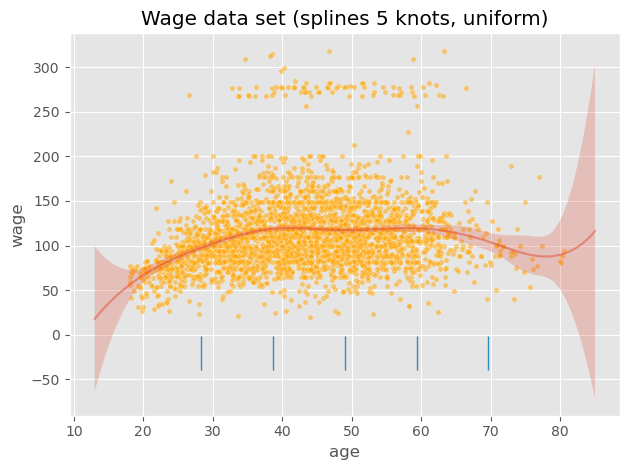

In [233]:
X = wage[['age']]
y = wage.wage

plt.figure(tight_layout=True)
sns.scatterplot(
    x=X.age+np.random.uniform(size=len(X.age)), 
    y=y, 
    s=15, 
    alpha=0.5, 
    color='orange'
)

x0 = np.linspace(X.age.min()-5, X.age.max()+5, 501)
x0_df = pd.DataFrame(dict(age=x0))


for d in [5]:
    knots = get_knots(
        X.age, 
        x0.min(), 
        x0.max(), 
        d, 
        'uniform'
        ).reshape(-1,1)
    model = make_pipeline(
        preprocessing.SplineTransformer( 
            degree=3,
            knots=knots,
            extrapolation='continue'
            ),
            linear_model.LinearRegression(fit_intercept=False)
            ).fit(X,y)

    haty = model.predict(x0_df)
    sigma = sigma_haty(model, X, y, x0_df)
    plt.fill_between(x0, haty-2*sigma,  haty+2*sigma, alpha=0.25)
    plt.plot(x0, haty, alpha=0.5) 

kn = model[0].bsplines_[0].t[4:-4]
plt.plot(kn, np.zeros_like(kn)-20, '|', markersize=25)
plt.title(f'Wage data set (splines {d} knots, uniform)')
plt.show()

## Heart disease data

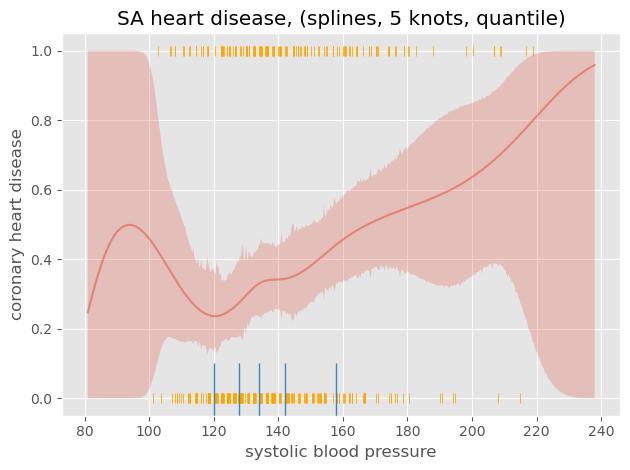

In [235]:
X, y = heart.data[['sbp']], heart.data.chd

plt.figure(tight_layout=True)
sns.scatterplot(
    x=X.sbp+np.random.uniform(size=len(X.sbp)), 
    y=y, 
    s=50, 
    marker='|', 
    color='orange'
    )

x0 = np.linspace(X.sbp.min()-20, X.sbp.max()+20, 501)
x0_df = pd.DataFrame(dict(sbp=x0))


for d in range(5,6):
    knots = get_knots(
        X.sbp, 
        x0.min(), 
        x0.max(), 
        d, 
        'quantile'
        ).reshape(-1,1)
    model = make_pipeline(
        preprocessing.SplineTransformer( 
            degree=3,
            knots=knots,
            extrapolation='continue'
        ),
        preprocessing.StandardScaler(),
        linear_model.LogisticRegression(
            penalty='none',
            solver='newton-cg'
        )
    ).fit(X,y)

    haty = model.predict_proba(x0_df)[:,1]
    
    plt.fill_between(
        x0, 
        *conf_int_logistic(model, X, y, x0_df), 
        alpha=0.25
    )
    plt.plot(x0, haty, alpha=0.5)

#plt.legend()
kn = model[0].bsplines_[0].t[4:-4]
plt.plot(kn, np.zeros_like(kn), '|', markersize=50)
plt.xlabel('systolic blood pressure')
plt.ylabel('coronary heart disease')
plt.title(f'SA heart disease, (splines, {d} knots, quantile)')
# plt.savefig('plots/11-26-splines-sa-heart.pdf')
plt.show()

# Natural cubic splines

This can be achived by modifying the `SplineTransformer` object. If we use `linear` extrapolation and the second derivative is zero at the end point of the interval then we are done. `sklearn` adds extra points to both end of the interval such that the first and last four points are equidistant. Then for the first three basis function the derivative follows the pattern $(1,-2, 1)$. With changing the control matrix we can achieve our goal.  

In [280]:
class NS(preprocessing.SplineTransformer):
    def __init__(self, *args, **kwargs):
        kwargs['extrapolation'] = 'linear'
        super().__init__(*args, **kwargs)

    def fit(self, X, y=None, **kwargs):
        super().fit(X, y, **kwargs)
        c = self.bsplines_[0].c 
        c[:, 1] += c[:, 0]+c[:, 2]
        c[:, 2] -= c[:, 0]
        c[:,-2] += c[:, -1]+c[:, -3]
        c[:, -3] -= c[:, -1]
        self.bsplines_[0].c = c[:, 1:-1]
        self.n_features_out_ -= 2
        return self
        
    def fit_transform(self, X, y=None, **kwargs):
        return self.fit(X, y, **kwargs).transform(X, **kwargs)
        


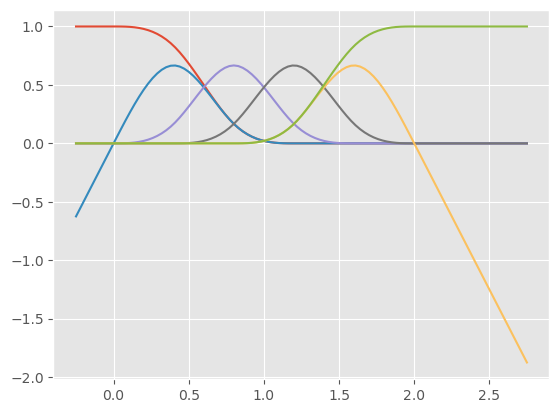

In [281]:
ns = NS(n_knots=6, knots='quantile', extrapolation='linear')
x = np.linspace(0, 2, 101)
ns.fit(np.expand_dims(x, 1))
x0 = 1.5*x-0.25
plt.plot(x0, ns.transform(np.expand_dims(x0, 1)))
plt.show()

In [283]:
ns.__dict__

{'n_knots': 6,
 'degree': 3,
 'knots': 'quantile',
 'extrapolation': 'linear',
 'include_bias': True,
 'order': 'C',
 'n_features_in_': 1,
 'bsplines_': [<scipy.interpolate._bsplines.BSpline at 0x7f4a9d9bda30>],
 'n_features_out_': 6}

# Wage data, with natural cubic splines

(3000, 1) (3000,)


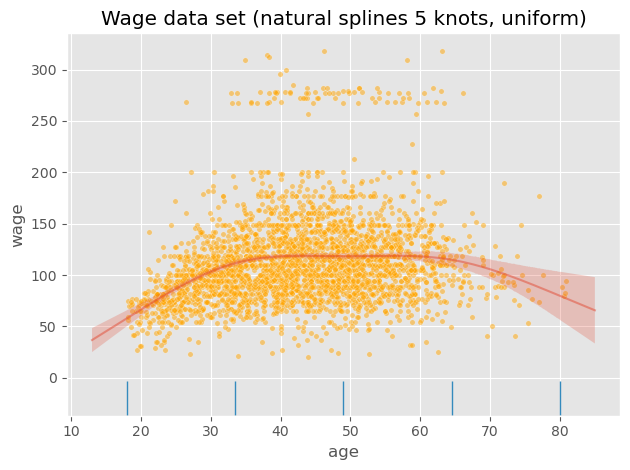

In [329]:
X = wage[['age']]
y = wage.wage

print(X.shape,y.shape)
plt.figure(tight_layout=True)
sns.scatterplot(
    x=X.age+np.random.uniform(size=len(X.age)), 
    y=y, 
    s=15, 
    alpha=0.5, 
    color='orange'
)

x0 = np.linspace(X.age.min()-5, X.age.max()+5, 501)
x0_df = pd.DataFrame(dict(age=x0))

for d in [5]:
    model = make_pipeline(
        NS(
            n_knots=d, 
            knots='uniform'
        ),
        preprocessing.StandardScaler(),
        linear_model.LinearRegression(fit_intercept=True)
    ).fit(X,y)
    
    haty = model.predict(x0_df)
    sigma = sigma_haty(model, X, y, x0_df)
    
    plt.fill_between(
        x0, 
        haty-2*sigma,  
        haty+2*sigma, 
        alpha=0.25
    )
    plt.plot(x0, haty, alpha=0.5) 

kn = model[0].bsplines_[0].t[3:-3]
plt.plot(kn, np.zeros_like(kn)-20, '|', markersize=25)
plt.title(f'Wage data set (natural splines {d} knots, uniform)')
plt.show()

(462, 1) (462,)


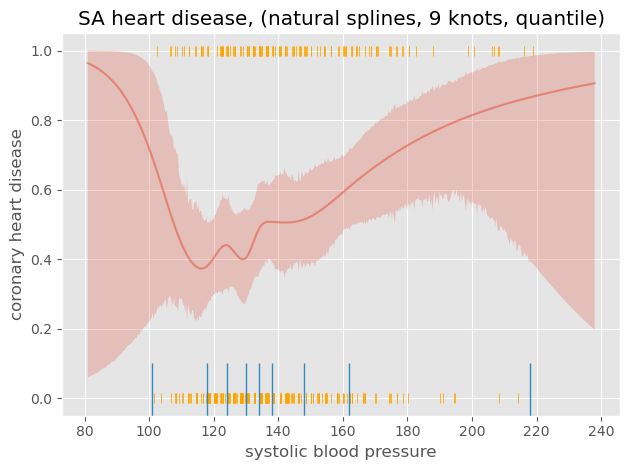

In [307]:
X, y = heart.data[['sbp']], heart.data.chd
print(X.shape,y.shape)
plt.figure(tight_layout=True)
sns.scatterplot(
    x=X.sbp+np.random.uniform(size=len(X.sbp)), 
    y=y, 
    s=50, 
    marker='|', 
    color='orange'
)

x0 = np.linspace(X.sbp.min()-20, X.sbp.max()+20, 501)
x0_df = pd.DataFrame(dict(sbp=x0))


for d in range(9,10):
    model = make_pipeline(
        NS(
            n_knots=d, 
            knots='quantile'
        ),
        preprocessing.StandardScaler(),
        linear_model.LogisticRegression(
            penalty='none',
            solver='newton-cg',
            fit_intercept=False
        )
    ).fit(X,y)
    
    haty = model.predict_proba(x0_df)[:, 1]
    plt.fill_between(
        x0, 
        *conf_int_logistic(model, X, y, x0_df),  
        alpha=0.25
    )
    plt.plot(x0, haty, alpha=0.5)

kn = model[0].bsplines_[0].t[3:-3]
plt.plot(kn, np.zeros_like(kn), '|', markersize=50)
plt.xlabel('systolic blood pressure')
plt.ylabel('coronary heart disease')
plt.title(f'SA heart disease, (natural splines, {d} knots, quantile)')
# plt.savefig('plots/11-26-nat-splines-sa-heart.pdf')
plt.show()

# Plots for the slides.

These plots were used to show RKHS associated with the smoothing splines

In [64]:
def h(x=1/7,a=0,b=1, scalex=True):
    if scalex:
        x = a+x*(b-a)
    def f(u):
        return -(1/(b-a)) *np.minimum((u-a)*(b-x),(b-u)*(x-a))
    return f

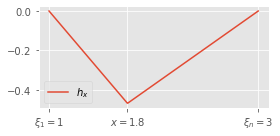

In [66]:
a,b = 1,3
u = np.linspace(a,b,501)
plt.figure(tight_layout=True, figsize=(4,2))
plt.plot(u,h(3/8,a=a,b=b)(u), label="$h_x$")
plt.xticks([1,1+6/8,3],['$\\xi_1=1$',f'$x={1+6/8:.2}$','$\\xi_n=3$'])
plt.legend()
# plt.savefig('plots/11-26-hx.pdf')


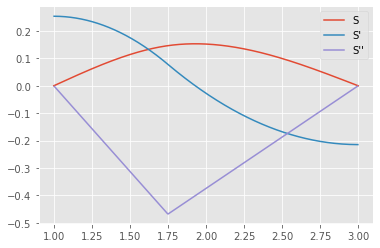

In [67]:
hx = h(3/8,a=a,b=b)(u)
hh = np.stack([h(v,a=a,b=b, scalex=False)(u) for v in u])
K = hh*hx

def mid(x, axis=None):
    if axis is not None:
        x= np.moveaxis(x,0,axis)
    x = (x[:-1]+x[1:])/2
    # print(x.shape)
    if axis is not None:
        x = np.moveaxis(x,0,axis)
        # print(x.shape)
    return x
def integrate(x, hx, axis=None):
    return x, (mid(hx,axis=axis)*np.diff(x)).sum(axis=axis)

u,S = integrate(u,K,axis=1)
plt.plot(u,S, label='S')
plt.plot(mid(u),np.diff(S)/np.diff(u), label="S'")

plt.plot(mid(mid(u)),np.diff(np.diff(S))/mid(np.diff(u))**2, label="S''")

plt.legend()


# GAM, generalized additive model

In [294]:
import csaps
import pygam

Type:        module
String form: <module 'pygam' from '/home/prokaj/.config/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/pygam/__init__.py'>
File:        ~/.config/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/pygam/__init__.py
Docstring:   GAM toolkit


year  age            maritl      race        education  \
231655  2006   18  1. Never Married  1. White     1. < HS Grad   
86582   2004   24  1. Never Married  1. White  4. College Grad   
161300  2003   45        2. Married  1. White  3. Some College   
155159  2003   43        2. Married  3. Asian  4. College Grad   
11443   2005   50       4. Divorced  1. White       2. HS Grad   

                    region        jobclass          health health_ins  \
231655  2. Middle Atlantic   1. Industrial       1. <=Good      2. No   
86582   2. Middle Atlantic  2. Information  2. >=Very Good      2. No   
161300  2. Middle Atlantic   1. Industrial       1. <=Good     1. Yes   
155159  2. Middle Atlantic  2. Information  2. >=Very Good     1. Yes   
11443   2. Middle Atlantic  2. Information       1. <=Good     1. Yes   

         logwage        wage  edu  (edu,)  (race0,)  race0  
231655  4.318063   75.043154    0       0         0      0  
86582   4.255273   70.476020    3       3         0      0  
161300  4.875061  130.982177    2       2         0      0  
155159  5.041393  154.685293    3       3         2      2  
11443   4.318063   75.043154    1       1         0      0

Text(0, 0.5, 'predicted wage')

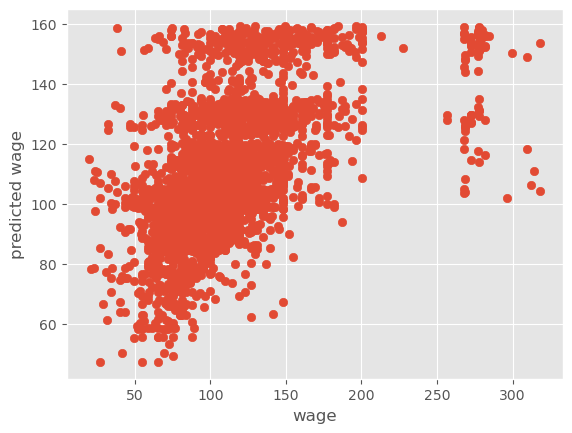

In [319]:
wage['edu']=preprocessing.LabelEncoder().fit_transform(wage['education'])
wage['race0']=preprocessing.LabelEncoder().fit_transform(wage['race'])
display(wage.head())

s,f = pygam.s, pygam.f
X = wage[['age', 'year', 'edu', 'race0']]
gam = pygam.GAM(s(0)+s(1)+f(2)).fit(X, wage.wage)
plt.scatter(x=wage.wage, y=gam.predict(X))
plt.xlabel('wage')
plt.ylabel('predicted wage')


In [330]:
gam.summary()

GAM                                                                                                       
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     25.1911
Link Function:                     IdentityLink Log Likelihood:                                -24118.6847
Number of Samples:                         3000 AIC:                                            48289.7516
                                                AICc:                                           48290.2307
                                                GCV:                                             1255.6902
                                                Scale:                                           1236.7251
                                                Pseudo R-Squared:                                   0.2955
Feature Function                  Lam

/tmp/ipykernel_855711/3358381670.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


(3000, 1) (3000,)


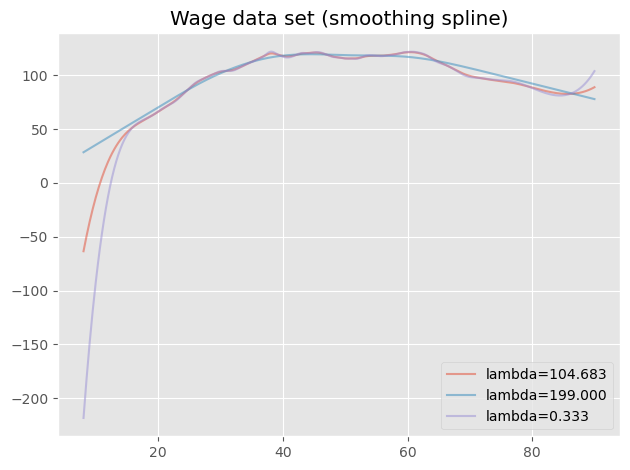

In [331]:
X = wage[['age']]
y = wage.wage

df = wage[['wage', 'age']].groupby('age').agg([lambda x: len(x), np.mean])
df.columns = ['weight', 'wage']

f = csaps.csaps(df.index, df.wage, weights=df.weight) #, normalizedsmooth=True)

print(X.shape, y.shape)
plt.figure(tight_layout=True)
x0 = np.linspace(X.age.min()-10, X.age.max()+10, 501)
x0_df = pd.DataFrame(dict(age=x0))

for p in [None, #0.1, 
          0.005, #0.5, 
          0.75]:
    f = csaps.csaps(df.index, df.wage, x0, weights=df.weight, smooth = p, normalizedsmooth=True)
    if p is None:
        p = f.smooth
        f = f.values
    plt.plot(x0, f ,#(x0), 
             alpha=0.5 , label=f'lambda={(1-p)/p:.3f}') #, label=f'#cut points={d-1}')

plt.legend()
plt.title(f'Wage data set (smoothing spline)')
# plt.savefig('plots/11-26-nat-splines-wage.pdf')
plt.show()

# Local regression

In [95]:
import statsmodels.api as sm

(3000, 1) (3000,)


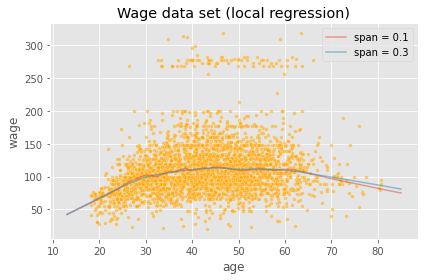

In [96]:
X = wage[['age']]
y = wage.wage

print(X.shape,y.shape)
plt.figure(tight_layout=True)
sns.scatterplot(x=X.age+np.random.uniform(size=len(X.age)), y=y, s=15, alpha=0.5, color='orange')
x0 = np.linspace(X.age.min()-5, X.age.max()+5, 501)
x0_df = pd.DataFrame(dict(age=x0))

for s in [0.1,0.3]: #range(9,10):
    haty= sm.nonparametric.lowess(y,X.age,frac=s,xvals=x0)
    plt.plot(x0,haty, alpha=0.5, label=f'span = {s}')

plt.legend()
plt.title(f'Wage data set (local regression)')
# plt.savefig('plots/11-26-loess-wage.pdf')
plt.show()

In [103]:
heart.data.describe()

sbp     tobacco         ldl   adiposity       typea     obesity  \
count  462.000000  462.000000  462.000000  462.000000  462.000000  462.000000   
mean   138.326840    3.635649    4.740325   25.406732   53.103896   26.044113   
std     20.496317    4.593024    2.070909    7.780699    9.817534    4.213680   
min    101.000000    0.000000    0.980000    6.740000   13.000000   14.700000   
25%    124.000000    0.052500    3.282500   19.775000   47.000000   22.985000   
50%    134.000000    2.000000    4.340000   26.115000   53.000000   25.805000   
75%    148.000000    5.500000    5.790000   31.227500   60.000000   28.497500   
max    218.000000   31.200000   15.330000   42.490000   78.000000   46.580000   

          alcohol         age         chd  
count  462.000000  462.000000  462.000000  
mean    17.044394   42.816017    0.346320  
std     24.481059   14.608956    0.476313  
min      0.000000   15.000000    0.000000  
25%      0.510000   31.000000    0.000000  
50%      7.510000   45.000000    0.000000  
75%     23.892500   55.000000    1.000000  
max    147.190000   64.000000    1.000000

In [346]:
from sklearn.model_selection import train_test_split

In [347]:
formula = "chd ~ " + " + ".join([f"cr({x},5)" for x in heart.data.columns if x not in ['chd','famhist']])
formula += ' + famhist'
formula
heart.data.columns

Index(['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity',
       'alcohol', 'age', 'chd', 'famhist_'],
      dtype='object')

In [352]:
s,f = pygam.s, pygam.f

heart.data['famhist_'] = preprocessing.LabelBinarizer().fit_transform(heart.data.famhist)

heart_train,heart_test = train_test_split(heart.data, test_size=0.2, shuffle=True, random_state=1)

X_train = heart_train.drop(columns=['chd','famhist'])
y_train = heart_train.chd
X_test = heart_test.drop(columns=['chd','famhist'])
y_test = heart_test.chd


heart_gam = pygam.LogisticGAM().fit(X_train, y_train)

#heart_gam.summary()

In [353]:
heart_gam.accuracy(X_train, y_train), heart_gam.accuracy(X_test, y_test)

(0.7777777777777778, 0.7311827956989247)

In [354]:
X_train.head()

sbp  tobacco   ldl  adiposity  typea  obesity  alcohol  age  \
row.names                                                                
297        142     0.00  4.19      18.04     56    23.65    20.78   42   
19         158     2.60  7.46      34.07     61    29.30    53.28   62   
41         118     0.28  5.80      33.70     60    30.98     0.00   41   
120        130     0.00  3.92      25.55     68    28.02     0.68   27   
243        190     4.18  5.05      24.83     45    26.09    82.85   41   

           famhist_  
row.names            
297               0  
19                1  
41                1  
120               0  
243               0

In [355]:
heart_gam.summary()

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     55.3958
Link Function:                        LogitLink Log Likelihood:                                  -162.6033
Number of Samples:                          369 AIC:                                              435.9982
                                                AICc:                                             456.7738
                                                UBRE:                                               3.3017
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.3259
Feature Function                  Lam

/tmp/ipykernel_855711/664956081.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  heart_gam.summary()


In [377]:

df_plot = pd.DataFrame({col: np.ones(101)*X_test[col].mean() for col in X_test.columns})
preds = {}
for col in X_test.columns:    
    x = X_test[col]
    df_plot0 = df_plot.copy()
    df_plot0[col] = np.linspace(x.min(), x.max(), 101)
    preds[col] = {
        'x': df_plot0[col],
        'y': heart_gam.predict_mu(df_plot0)
    }


In [378]:
for col, value in preds.items():
    print(f'{col} min = {value["y"].min()} max = {value["y"].max()}')

sbp min = 0.2935503361084495 max = 0.8719836357294363
tobacco min = 0.23101295958964924 max = 0.9740996431587285
ldl min = 0.2637203523815135 max = 0.6674459822348375
adiposity min = 0.13855297717433263 max = 0.6448195165775572
typea min = 0.1725675276638908 max = 0.9978049888715413
obesity min = 0.17474407654948027 max = 0.8915821858326558
alcohol min = 0.28178338286177657 max = 0.4061084518780344
age min = 0.046045025776002155 max = 0.5765254562402469
famhist_ min = 0.32489056615317097 max = 0.5556953714242301


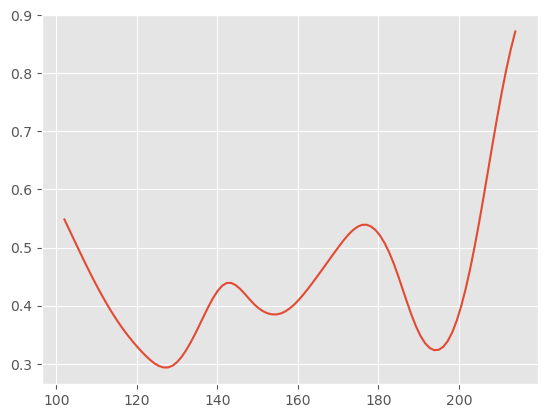

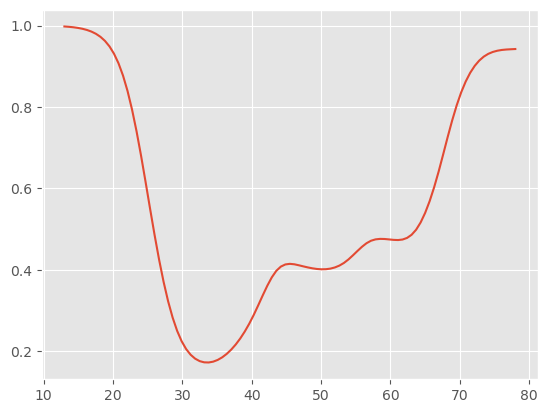

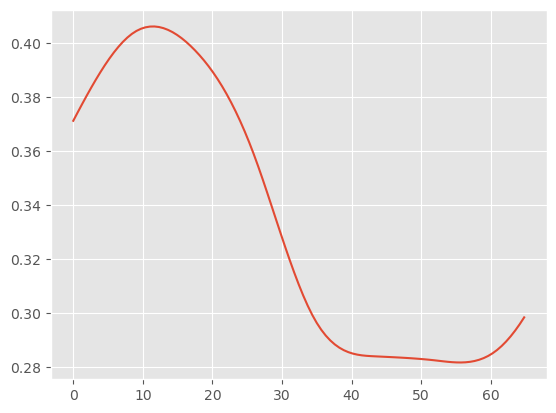

In [379]:
plt.plot('x','y', '', data=preds['sbp'])
plt.show()
plt.plot('x','y', '', data=preds['typea'])
plt.show()
plt.plot('x','y', '', data=preds['alcohol'])
plt.show()


In [376]:
heart_gam.predict_mu?

Signature: heart_gam.predict_mu(X)
Docstring:
preduct expected value of target given model and input X

Parameters
---------
X : array-like of shape (n_samples, m_features),
    containing the input dataset

Returns
-------
y : np.array of shape (n_samples,)
    containing expected values under the model
File:      ~/.config/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/pygam/pygam.py
Type:      method


In [ ]:
import scipy

[[0.17 0.67 0.17 0.   0.   0.   0.   0.   0.  ]
 [0.   0.17 0.67 0.17 0.   0.   0.   0.   0.  ]
 [0.   0.   0.17 0.67 0.17 0.   0.   0.   0.  ]
 [0.   0.   0.   0.17 0.67 0.17 0.   0.   0.  ]
 [0.   0.   0.   0.   0.17 0.67 0.17 0.   0.  ]
 [0.   0.   0.   0.   0.   0.17 0.67 0.17 0.  ]
 [0.   0.   0.   0.   0.   0.   0.17 0.67 0.17]]
(7, 9)


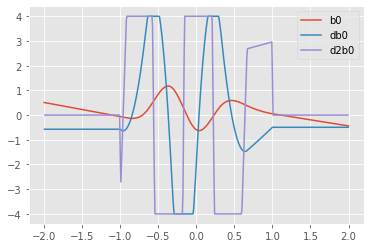

In [97]:
X = np.random.normal(size=(20,1))
X0 = np.linspace(-1,1,7).reshape(-1,1)
X0.sort(axis=0)
spline = preprocessing.SplineTransformer(knots=X0,
                                         degree=3,
                                         extrapolation='linear', 
                                         include_bias=True).fit(X0)

print(spline.transform(X0).round(2))
print(spline.transform(X0).shape)

x=np.linspace(-2,2,501)

for i in range(1):
    beta = np.zeros(spline.n_features_out_-4)
    beta[i] = 1
    beta = np.random.normal(size=beta.shape)
    y = spline.transform(x.reshape(-1,1))[:,2:-2] @ beta
    plt.plot(x,y, label=f'b{i}')
    
    xc = 0.5*(x[:-1]+x[1:])
    yc = np.diff(y)/np.diff(x)
    plt.plot(xc,yc.clip(-4,4),label=f'db{i}')
    
    yc = np.diff(yc)/np.diff(xc)
    xc = 0.5*(xc[:-1]+xc[1:])
    plt.plot(xc,yc.clip(-4,4),label=f'd2b{i}')
    
    yc = np.diff(yc)/np.diff(xc)
    xc = 0.5*(xc[:-1]+xc[1:])
    #plt.plot(xc,yc.clip(-4,4),label=f'd3b{i}')
    
plt.legend()
plt.show()
#print(spline.transform(x.reshape(-1,1)).round(2))


In [341]:
def smoothing_penalty_matrix(x):
    delta = np.diff(x)
    Delta = np.diag(-1/delta,1)
    Delta[:,:-1] -=  Delta[:,1:]
    Delta[:-1] -= Delta[1:]
    Delta = Delta[:-2]
    W = np.diag(delta[1:-1]/6,1)+np.diag((delta[:-1]+delta[1:])/3)+np.diag(delta[1:-1]/6,-1)
    return np.dot(Delta.T,np.linalg.solve(W, Delta))

def modified_smoothing_penalty_matrix(x):
    return smoothing_penalty_matrix(x)[1:-1,1:-1]

def smooth(x, y, weights=1):
    x, y = np.asarray(x), np.asarray(y)
    w = np.asarray(weights)
    order = np.argsort(x)
    x, y = x[order], y[order]
    P = modified_smoothing_penalty_matrix(x)
    L = np.linalg.cholesky(P)
    X = np.linalg.inv(L.T)
    print(X.shape)
    X = np.concatenate(
        [
            np.zeros((1, X.shape[1])),
            X,
            np.zeros((1, X.shape[1]))
        ], axis=0)
    print(X.shape)
    x0 = x
    x0 = (x0-(w*x0).sum()/w.sum())
    s = (w*(x0**2)).sum()**0.5
    x0 /= s
    X -= np.outer(x0, np.dot(X.T, w*x0))
    # dy = (y[-1]-y[0])*(x-x[0])/(x[-1]-x[0]) #
    dy = np.dot(y, w*x0)*x0
    dy -= (w*dy).sum()/w.sum()
    y0 = y - dy 
    return X, y0, dy

weight        wage  age
age                         
18       11   64.493063   18
19       14   53.990486   19
20       20   69.033341   20
21       15   75.906952   21
22       38   72.251667   22
..      ...         ...  ...
74        3  106.192881   74
75        2   69.389644   75
76        3  109.219665   76
77        1   99.689464   77
80        4   86.147071   80

[61 rows x 3 columns]

(59, 59)
(61, 59)


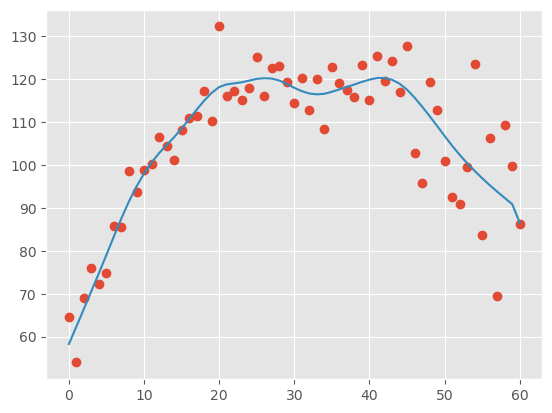

In [344]:
df['age']=df.index

display(df)

X, y, dy = smooth(df.age, df.wage, df.weight)

ridge = make_pipeline(# preprocessing.StandardScaler(),
                      linear_model.RidgeCV(alphas=[1, 5, 10, 15, 100, 1000]))

ridge.fit(
    X, 
    y, 
    ridgecv__sample_weight=df.weight
)

plt.plot(y+dy, 'o')

plt.plot(ridge.predict(X)+dy)

In [ ]:
X, y, dy = smooth(-df.age,df.wage, df.weight)
ridge = make_pipeline(# preprocessing.StandardScaler(),
                      sklearn.linear_model.RidgeCV(alphas=[1,5,10,15,100,1000]))
ridge.fit(X,y, ridgecv__sample_weight=df.weight)
plt.plot(y+dy)
plt.plot(ridge.predict(X)+dy)

In [ ]:
import csaps

In [339]:
df = wage[['wage', 'age']].groupby('age').agg([len,np.mean])
df.columns = ['weight', 'wage']
f = csaps.csaps(df.index, df.wage, weights=df.weight, normalizedsmooth=True)

In [333]:
import statsmodels.api as sm

smGAM = sm.OLS.from_formula('wage ~ cr(year, df=5) + cr(age, df=4) + education', data=wage).fit()
smGAM.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     112.0
Date:                Fri, 25 Nov 2022   Prob (F-statistic):          1.78e-214
Time:                        12:11:25   Log-Likelihood:                -14932.
No. Observations:                3000   AIC:                         2.989e+04
Df Residuals:                    2988   BIC:                         2.996e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          52.1819      1.917     27.221      0.000      48.423      55.941
education[T.2. HS Grad]            10.8398      2.430      4.460      0.000       6.075      15.605
education[T.3. Some College]       23.3221      2.559      9.115      0.000      18.305      28.339
education[T.4. College Grad]       38.1027      2.542     14.988      0.000      33.118      43.087
education[T.5. Advanced Degree]    62.5230      2.757     22.675      0.000      57.117      67.929
cr(year, df=5)[0]                   6.1758      1.415      4.364      0.000       3.401       8.950
cr(year, df=5)[1]                   8.5649      1.392      6.155      0.000       5.836      11.294
cr(year, df=5)[2]                  12.5529      1.431      8.773      0.000       9.747      15.358
cr(year, df=5)[3]                  11.1253      1.480      7.519      0.000       8.224      14.027
cr(year, df=5)[4]                  13.7630      1.584      8.690      0.000      10.658      16.868
cr(age, df=4)[0]                  -14.0037      3.082     -4.544      0.000     -20.046      -7.961
cr(age, df=4)[1]                   26.8936      1.818     14.794      0.000      23.329      30.458
cr(age, df=4)[2]                   26.4710      1.899     13.941      0.000      22.748      30.194
cr(age, df=4)[3]                   12.8210      6.118      2.095      0.036       0.824      24.818
==============================================================================
Omnibus:                     1040.738   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5593.599
Skew:                           1.557   Prob(JB):                         0.00
Kurtosis:                       8.921   Cond. No.                     1.05e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.18e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [334]:
smGAM1 = sm.OLS.from_formula('wage ~ year + age + education', data=wage).fit()
smGAM1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     177.0
Date:                Fri, 25 Nov 2022   Prob (F-statistic):          3.16e-193
Time:                        12:11:44   Log-Likelihood:                -14994.
No. Observations:                3000   AIC:                         3.000e+04
Df Residuals:                    2993   BIC:                         3.004e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                       -2058.0770    649.346     -3.169      0.002   -3331.287    -784.867
education[T.2. HS Grad]            11.3976      2.476      4.603      0.000       6.542      16.253
education[T.3. Some College]       24.2345      2.606      9.301      0.000      19.125      29.344
education[T.4. College Grad]       39.7408      2.586     15.367      0.000      34.670      44.812
education[T.5. Advanced Degree]    64.8537      2.804     23.128      0.000      59.355      70.352
year                                1.0563      0.324      3.262      0.001       0.421       1.691
age                                 0.5621      0.057      9.838      0.000       0.450       0.674
==============================================================================
Omnibus:                      994.533   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5067.917
Skew:                           1.497   Prob(JB):                         0.00
Kurtosis:                       8.619   Cond. No.                     1.99e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.99e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [337]:
smGLM = sm.GLM.from_formula('chd ~ cr(sbp, df=5) + cr(age, df=4)', 
                            data=heart.data, 
                            family=sm.families.Binomial()).fit()

smGLM.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    chd   No. Observations:                  462
Model:                            GLM   Df Residuals:                      454
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -258.27
Date:                Fri, 25 Nov 2022   Deviance:                       516.54
Time:                        12:12:25   Pearson chi2:                     447.
No. Iterations:                    26   Pseudo R-squ. (CS):             0.1582
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.5547      0.211     -2.624      0.009      -0.969      -0.140
cr(sbp, df=5)[0]     0.3206      0.619      0.518      0.605      -0.893       1.534
cr(sbp, df=5)[1]    -0.7296      0.299     -2.439      0.015      -1.316      -0.143
cr(sbp, df=5)[2]    -0.5320      0.243     -2.191      0.028      -1.008      -0.056
cr(sbp, df=5)[3]    -0.5003      0.369     -1.357      0.175      -1.223       0.222
cr(sbp, df=5)[4]     0.8866      0.820      1.081      0.280      -0.721       2.494
cr(age, df=4)[0]    -2.6857      0.661     -4.063      0.000      -3.981      -1.390
cr(age, df=4)[1]    -0.1017      0.280     -0.363      0.716      -0.650       0.447
cr(age, df=4)[2]     0.7293      0.234      3.113      0.002       0.270       1.188
cr(age, df=4)[3]     1.5034      0.316      4.753      0.000       0.884       2.123
====================================================================================
"""